In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Import libraries for model building and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Building a dataframe with the .csv
df = pd.read_csv('Grinding_Planilha.csv', sep=';', encoding= 'unicode_escape')
df.head()

,Unnamed: 0,Status,Station,Flow Rate,Quality Matrix Factor,Pressure 1,Pressure 1 Especification,Initial Pressure,Cut off flow rate,C.o.f rate corrected,...,Unnamed: 17,Flow Pressure,Flow Corrected,Flow,Oil Temperature,Flow pressure before grinding w/o back pressure,flow rate before grinding w/o back pressure- corrected,flow rate before Grinding w/o back pressure,flow rate measuring temperature before grinding w/o back pressure,Sub_Parts_Status
0,NaN,State,St.No.,F1,F2,F3,F4,F5,F6,F7,...,NaN,F11,F12,F13,oil,NaN,NaN,NaN,NaN,NaN
1,1.0,OK,2,0,1.201931,110.2617,110,111.0537,303.4803,289.0135,...,NaN,100.1036,289.2806,288.9905,39.1,100.0283,264.0800,263.7370,39.32,THF_ok
2,3.0,OK,2,0,1.201931,110.3506,110,109.7643,303.6059,289.0167,...,NaN,100.0984,287.3397,287.2159,40.3,100.0630,249.8343,249.6066,39.72,THF_ok
3,5.0,OK,2,0,1.201931,110.1836,110,109.6748,303.363,289.0042,...,NaN,100.1296,287.4602,287.4278,40.6,100.0858,264.5579,264.3862,40.00,THF_ok
4,6.0,OK,2,0,1.201931,109.6387,110,109.5693,302.6254,289.017,...,NaN,100.1292,287.9584,287.9426,40.72,100.0750,266.8908,266.7341,40.24,THF_ok


In [ ]:
#Excluding the first line of dataframe
df = df.drop(df.index[0])
#Excluding columnn 17
df = df.drop(df.columns[17], axis=1)
#Excluding lines with Status = NOK
df = df[df['Status'] != 'NOK']
#Excluding anothers Columns
df = df.drop(['Status', 'Sub_Parts_Status','Unnamed: 0', 'Station', 'Process','Quality Matrix Factor'], axis=1)

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 19710 entries, 1 to 20693
Data columns (total 20 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Flow Rate                                                          19710 non-null  object 
 1   Pressure 1                                                         19710 non-null  object 
 2   Pressure 1 Especification                                          19710 non-null  object 
 3   Initial Pressure                                                   19710 non-null  object 
 4   Cut off flow rate                                                  19710 non-null  object 
 5   C.o.f rate corrected                                               19710 non-null  object 
 6   C.o.f rate especification                                          19710 non-null  object 
 7   Initial Flow Rate          

In [ ]:
# Converting all 'objects' features in 'numerics'
cols_to_convert = df.select_dtypes(include=['object']).columns
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 19710 entries, 1 to 20693
Data columns (total 20 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Flow Rate                                                          19710 non-null  float64
 1   Pressure 1                                                         19710 non-null  float64
 2   Pressure 1 Especification                                          19710 non-null  int64  
 3   Initial Pressure                                                   19710 non-null  float64
 4   Cut off flow rate                                                  19710 non-null  float64
 5   C.o.f rate corrected                                               19710 non-null  float64
 6   C.o.f rate especification                                          19710 non-null  float64
 7   Initial Flow Rate          

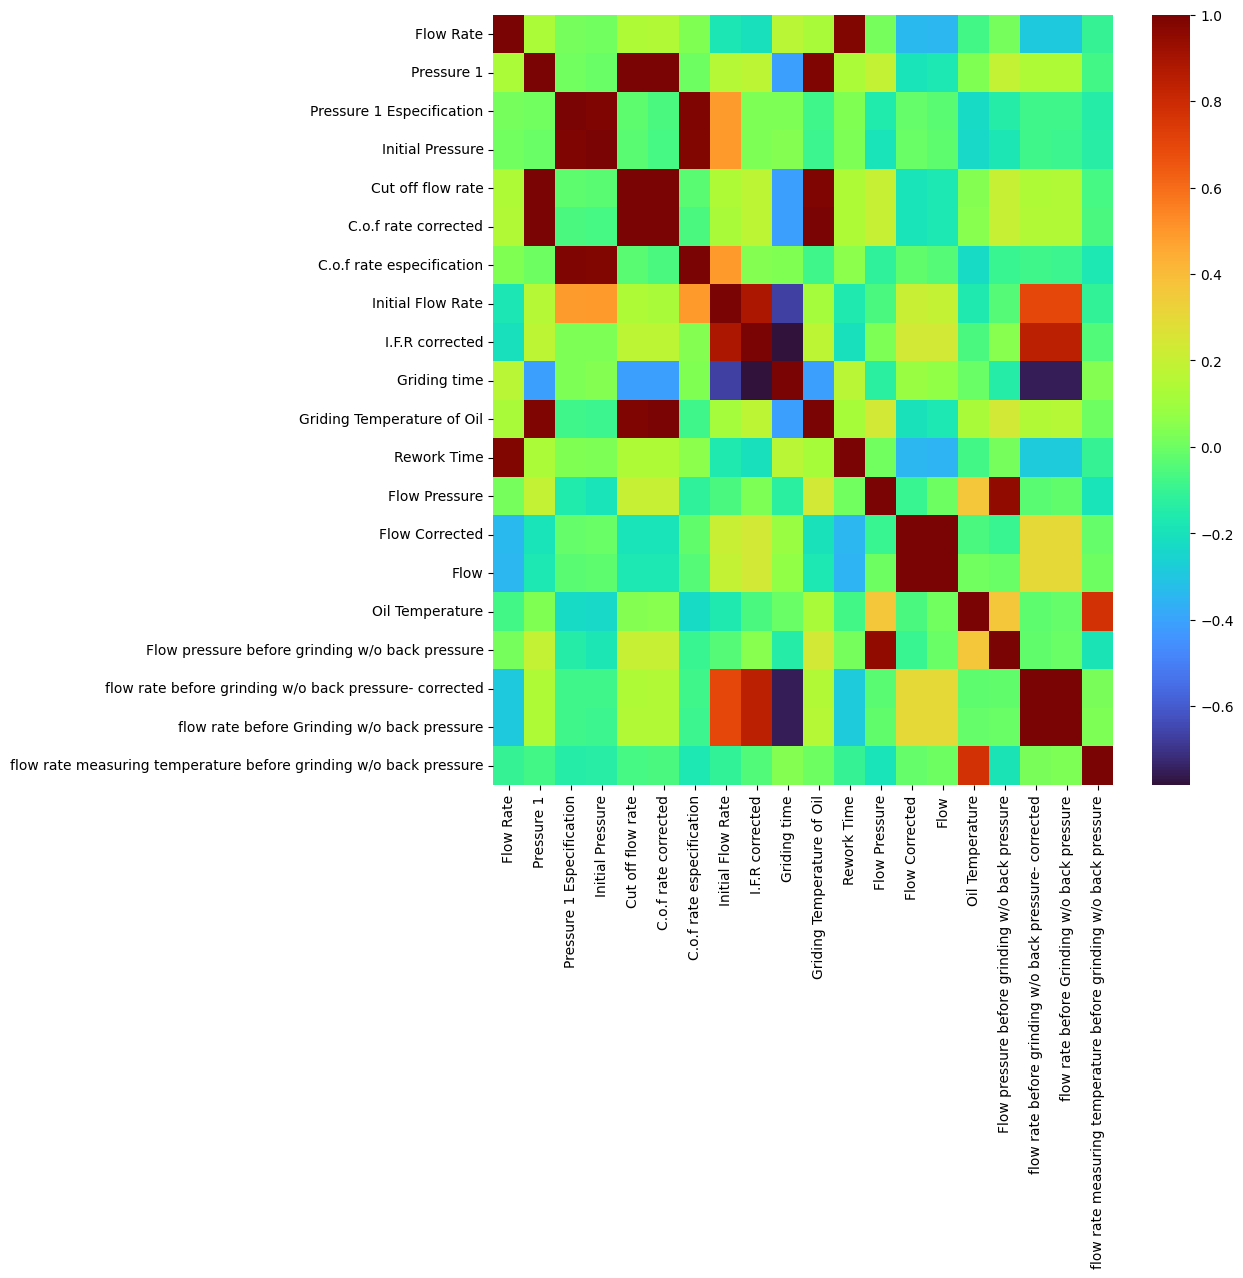

In [ ]:
# Showing the matrix correlations (Pearson, but could be Kendall or Spearman) setting threshold
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='turbo', annot=False)
plt.show()

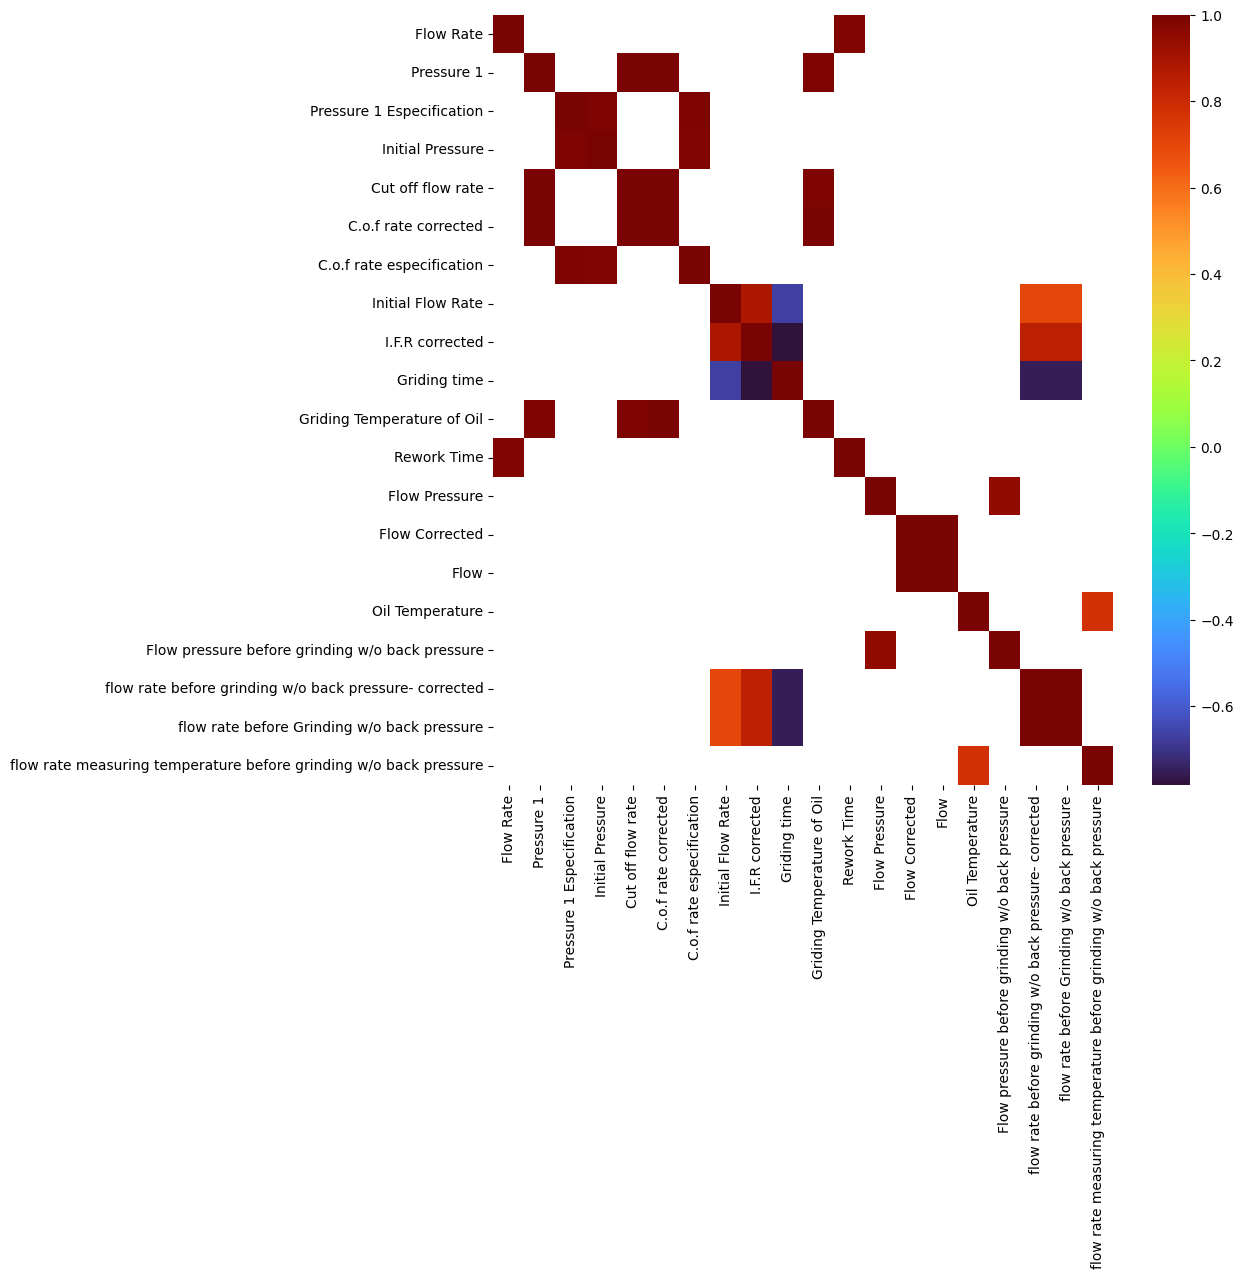

In [ ]:
# Showing the matrix correlations setting threshold
threshold = 0.5
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix[abs(corr_matrix) >= threshold], cmap='turbo', annot=False)
plt.show()

**Algortimo Genético**
---



In [ ]:
#Analyze importance data trought random forest

#Spliting dataset in training and testing
sample_frac = 0.2  # Por exemplo, 20% da base
# Reduz a base mantendo o vínculo entre X e y
df_reduced = df.sample(frac=sample_frac, random_state=42)


X = df_reduced.drop(['Griding time'], axis=1)
y = df_reduced['Griding time']

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
X = pd.DataFrame(X_scale, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gen	nevals	avg     	max    
0  	50    	0.835529	0.90798
1  	31    	0.89724 	0.909102
2  	36    	0.903681	0.910328
3  	32    	0.906357	0.910328
4  	32    	0.907875	0.910328
5  	37    	0.907407	0.910862
6  	35    	0.909421	0.910862
7  	19    	0.909878	0.910862
8  	26    	0.909591	0.910889
9  	28    	0.910031	0.910978
10 	31    	0.90732 	0.910862
11 	36    	0.907917	0.911716
12 	33    	0.909274	0.911716
13 	31    	0.908396	0.911716
14 	37    	0.909651	0.911716
15 	29    	0.909739	0.910891
16 	27    	0.908904	0.910958
17 	26    	0.909316	0.910891
18 	26    	0.909937	0.910891
19 	33    	0.908711	0.910891
20 	35    	0.906196	0.910891


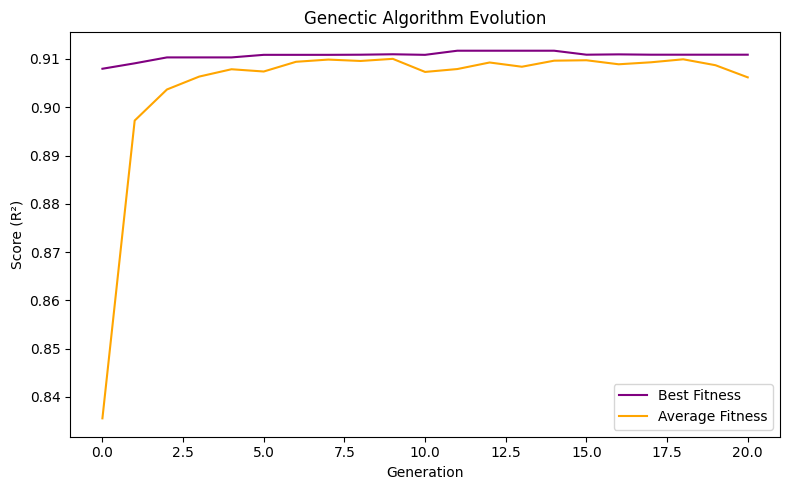

Selected Features: ['Flow Rate', 'Cut off flow rate', 'C.o.f rate especification', 'Initial Flow Rate', 'I.F.R corrected', 'Griding Temperature of Oil', 'Flow Corrected', 'flow rate before Grinding w/o back pressure', 'flow rate measuring temperature before grinding w/o back pressure']


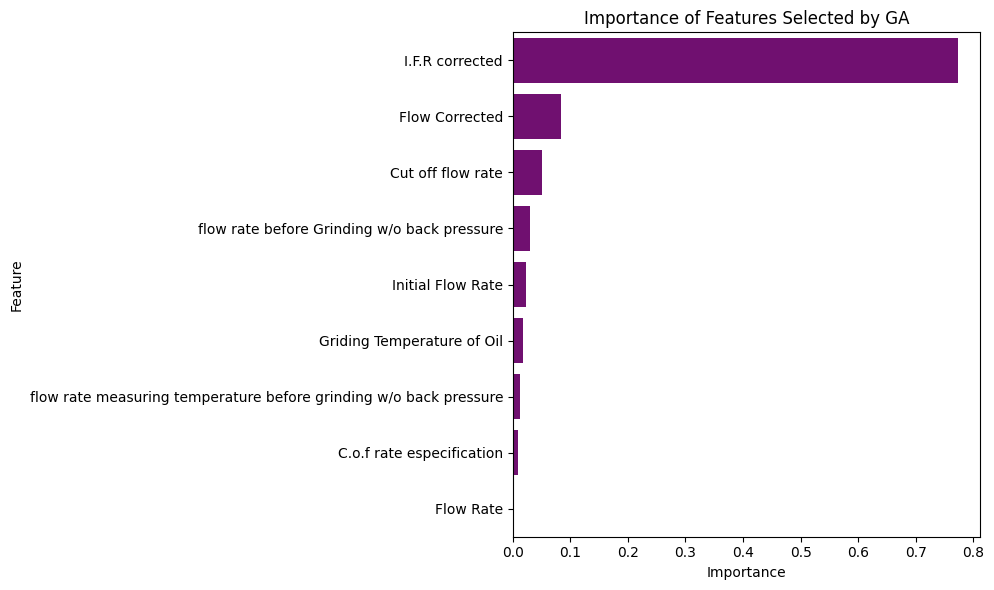

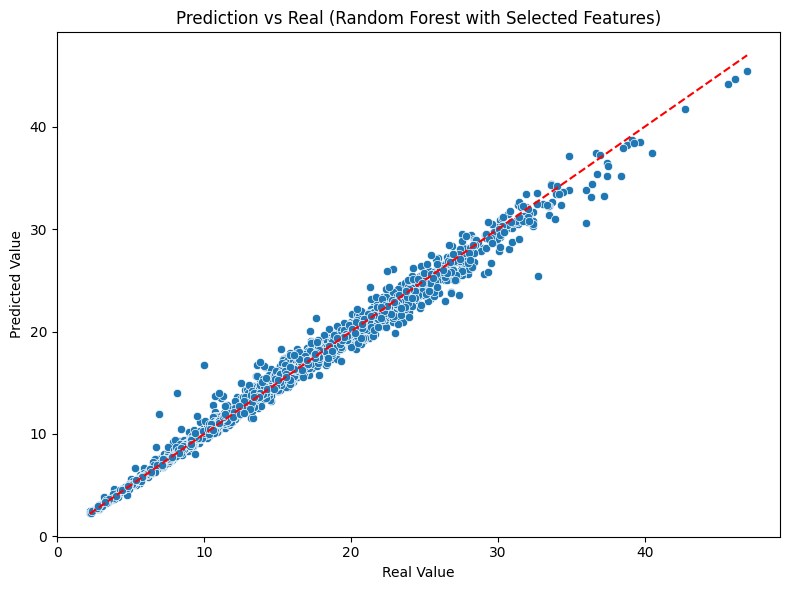

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from deap import base, creator, tools, algorithms


# === Setup ===
X = X_train  # ou seu DataFrame de treino
y = y_train
n_features = X.shape[1]

# === GA configuration ===
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# === Função de fitness ===
def evalFeatureSelection(individual):
    if sum(individual) == 0:
        return -9999,  # evita solução com 0 features
    selected = [i for i, bit in enumerate(individual) if bit == 1]
    X_sel = X.iloc[:, selected]
    model = RandomForestRegressor()
    scores = cross_val_score(model, X_sel, y, cv=5, scoring='r2')
    return scores.mean(),

toolbox.register("evaluate", evalFeatureSelection)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# === Execução e coleta de estatísticas ===
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("max", np.max)

pop = toolbox.population(n=50)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=20, stats=stats, verbose=True)

# === Plot: evolução do GA ===
gen = log.select("gen")
fit_max = log.select("max")
fit_avg = log.select("avg")

plt.figure(figsize=(8, 5))
plt.plot(gen, fit_max, label='Best Fitness', color = 'purple')
plt.plot(gen, fit_avg, label='Average Fitness', color = 'orange')
plt.xlabel("Generation")
plt.ylabel("Score (R²)")
plt.title("Genectic Algorithm Evolution")
plt.legend()
plt.tight_layout()
plt.show()

# === Melhor indivíduo ===
best_ind = tools.selBest(pop, 1)[0]
selected_features = [col for i, col in enumerate(X.columns) if best_ind[i] == 1]

print("Selected Features:", selected_features)

# === Treinar modelo final e plotar importância ===
X_sel_final = X[selected_features]
model_final = RandomForestRegressor()
model_final.fit(X_sel_final, y)

# Plot: Importância das features
importances = model_final.feature_importances_
df_imp = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, color='purple')
plt.title('Importance of Features Selected by GA')
plt.tight_layout()
plt.show()

# === Predição e comparação com valores reais ===
y_pred = model_final.predict(X_sel_final)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Real (Random Forest with Selected Features)')
plt.tight_layout()
plt.show()

**Análise Estatística**
---



In [ ]:
#Spliting dataset in training and testing
X = df.drop(['Griding time'], axis=1)
y = df['Griding time']

# Transformar o y em vetor numpy
y = np.array(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

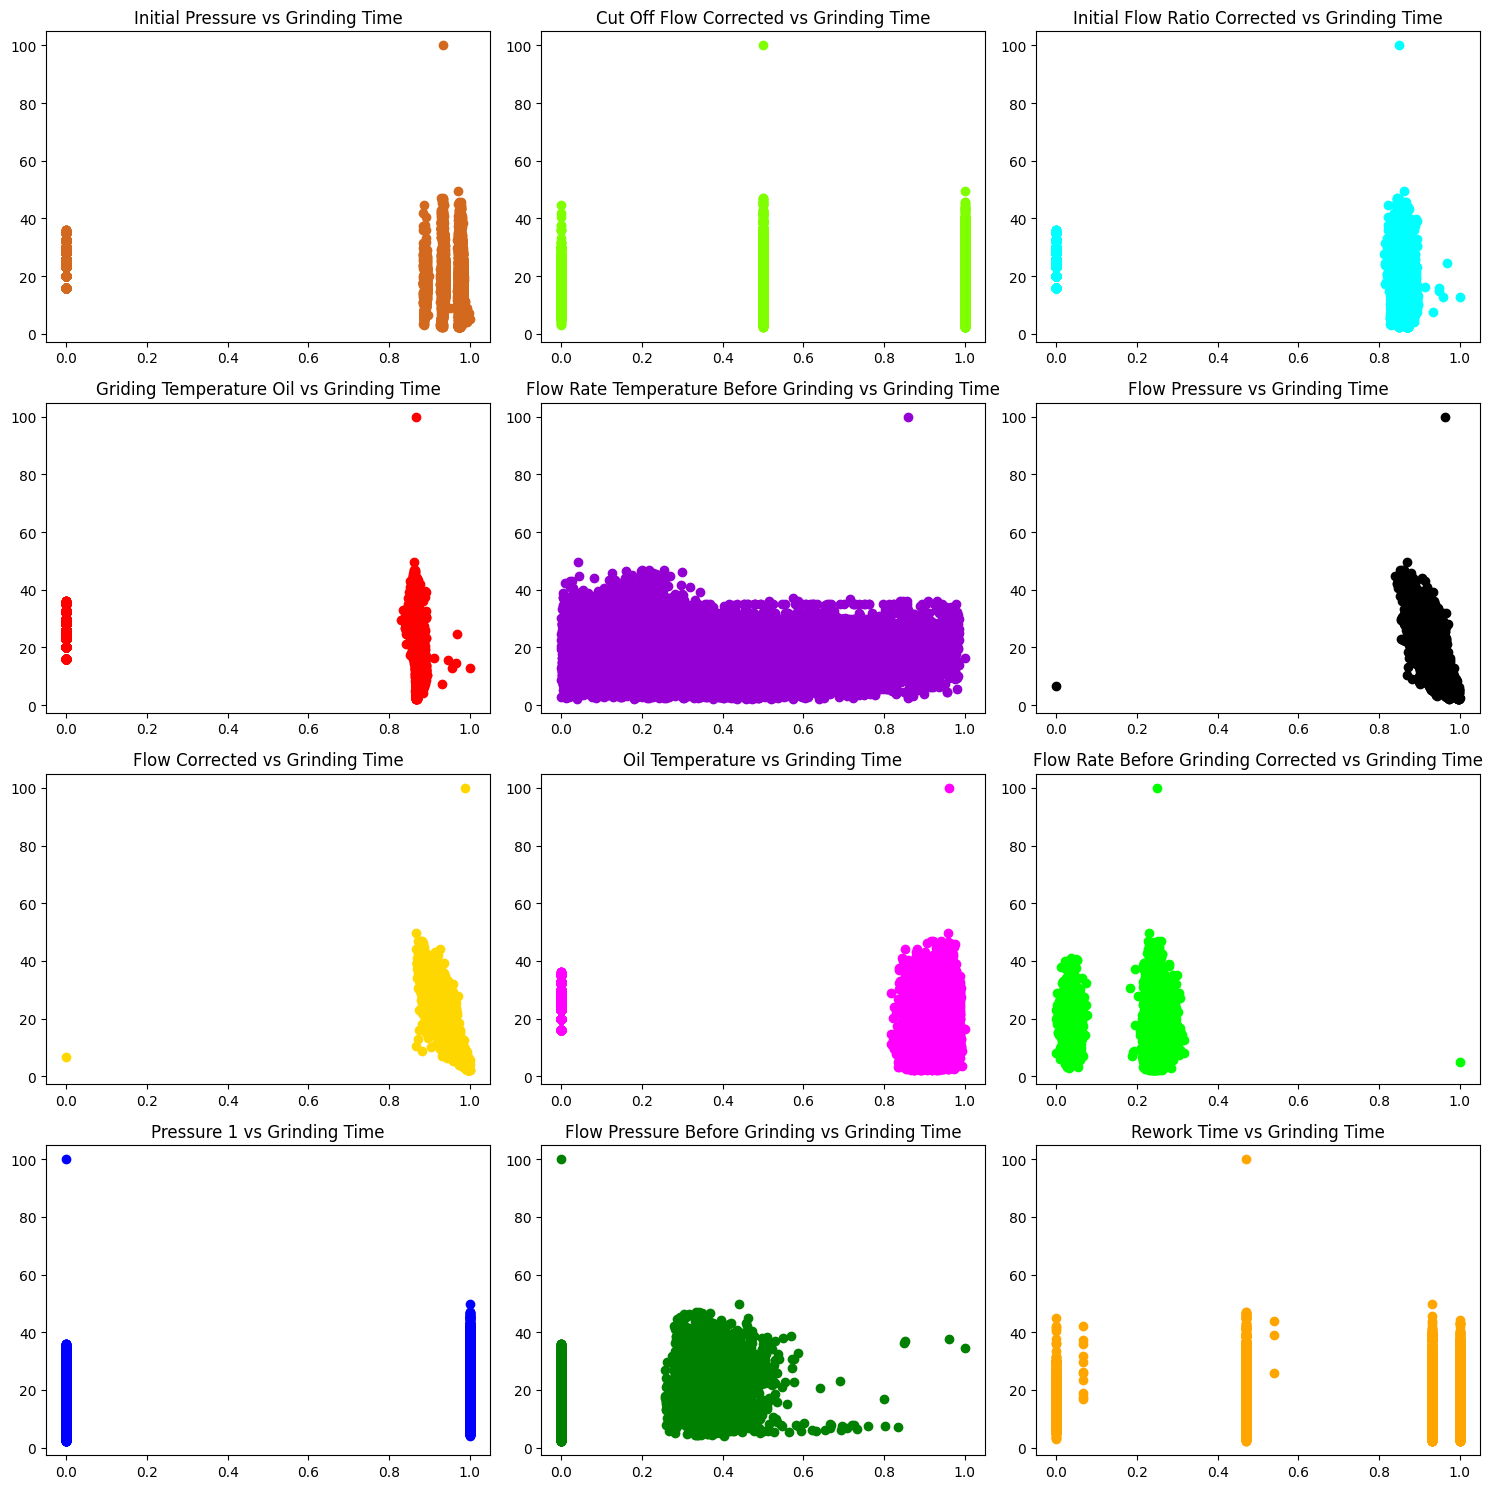

In [ ]:
from re import sub
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes[0,0].plot(X[:,1],y, 'o', color='chocolate')
axes[0,0].set_title('Initial Pressure vs Grinding Time')
axes[0,1].plot(X[:,2],y, 'o', color='chartreuse')
axes[0,1].set_title('Cut Off Flow Corrected vs Grinding Time')
axes[0,2].plot(X[:,4],y, 'o', color='aqua')
axes[0,2].set_title('Initial Flow Ratio Corrected vs Grinding Time')
axes[1,0].plot(X[:,5],y, 'o', color='red')
axes[1,0].set_title('Griding Temperature Oil vs Grinding Time')
axes[1,1].plot(X[:,12],y, 'o', color='darkviolet')
axes[1,1].set_title('Flow Rate Temperature Before Grinding vs Grinding Time')
axes[1,2].plot(X[:,7],y, 'o', color='black')
axes[1,2].set_title('Flow Pressure vs Grinding Time')
axes[2,0].plot(X[:,8],y, 'o', color='gold')
axes[2,0].set_title('Flow Corrected vs Grinding Time')
axes[2,1].plot(X[:,9],y, 'o', color='fuchsia')
axes[2,1].set_title('Oil Temperature vs Grinding Time')
axes[2,2].plot(X[:,11],y, 'o', color='lime')
axes[2,2].set_title('Flow Rate Before Grinding Corrected vs Grinding Time')
axes[3,0].plot(X[:,0],y, 'o', color='blue')
axes[3,0].set_title('Pressure 1 vs Grinding Time')
axes[3,1].plot(X[:,10],y, 'o', color='green')
axes[3,1].set_title('Flow Pressure Before Grinding vs Grinding Time')
axes[3,2].plot(X[:,6],y, 'o', color='orange')
axes[3,2].set_title('Rework Time vs Grinding Time')

plt.tight_layout()
plt.show

In [ ]:
# Reduzindo Outliers
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
upper_bound = Q3 + 1.75 * IQR
lower_bound = Q1 - 1.75 * IQR
outliers = df[(df > upper_bound)]

df_no_outliers = df[~((df > upper_bound) | (df < lower_bound)).any(axis=1)]
#df_no_outliers = df[~((df > upper_bound)).any(axis=1)]

In [ ]:
'''
# Definindo os quartis e calculando o IQR para 'Flow Pressure'
Q1_fp = df_new['Flow Pressure'].quantile(0.55)
Q3_fp = df_new['Flow Pressure'].quantile(0.95)
IQR_fp = Q3_fp - Q1_fp
lower_bound_fp = Q1_fp - 1.5 * IQR_fp  # Limite inferior para outliers em 'Flow Pressure'

# Definindo os quartis e calculando o IQR para 'Flow Corrected'
Q1_fc = df_new['Flow Corrected'].quantile(0.35)
Q3_fc = df_new['Flow Corrected'].quantile(0.75)
IQR_fc = Q3_fc - Q1_fc
lower_bound_fc = Q1_fc - 1.5 * IQR_fc  # Limite inferior para outliers em 'Flow Corrected'

# Criando um DataFrame booleano para identificar outliers inferiores
outliers_fp = df_new['Flow Pressure'] < lower_bound_fp
outliers_fc = df_new['Flow Corrected'] < lower_bound_fc

# Combinando as condições para ambas as colunas usando any(axis=1)
outliers_combined = pd.DataFrame({'Flow Pressure': outliers_fp, 'Flow Corrected': outliers_fc}).any(axis=1)

# Filtrando o DataFrame para remover outliers inferiores
df_no_outliers = df_new[~outliers_combined]
'''

<function matplotlib.pyplot.show(close=None, block=None)>

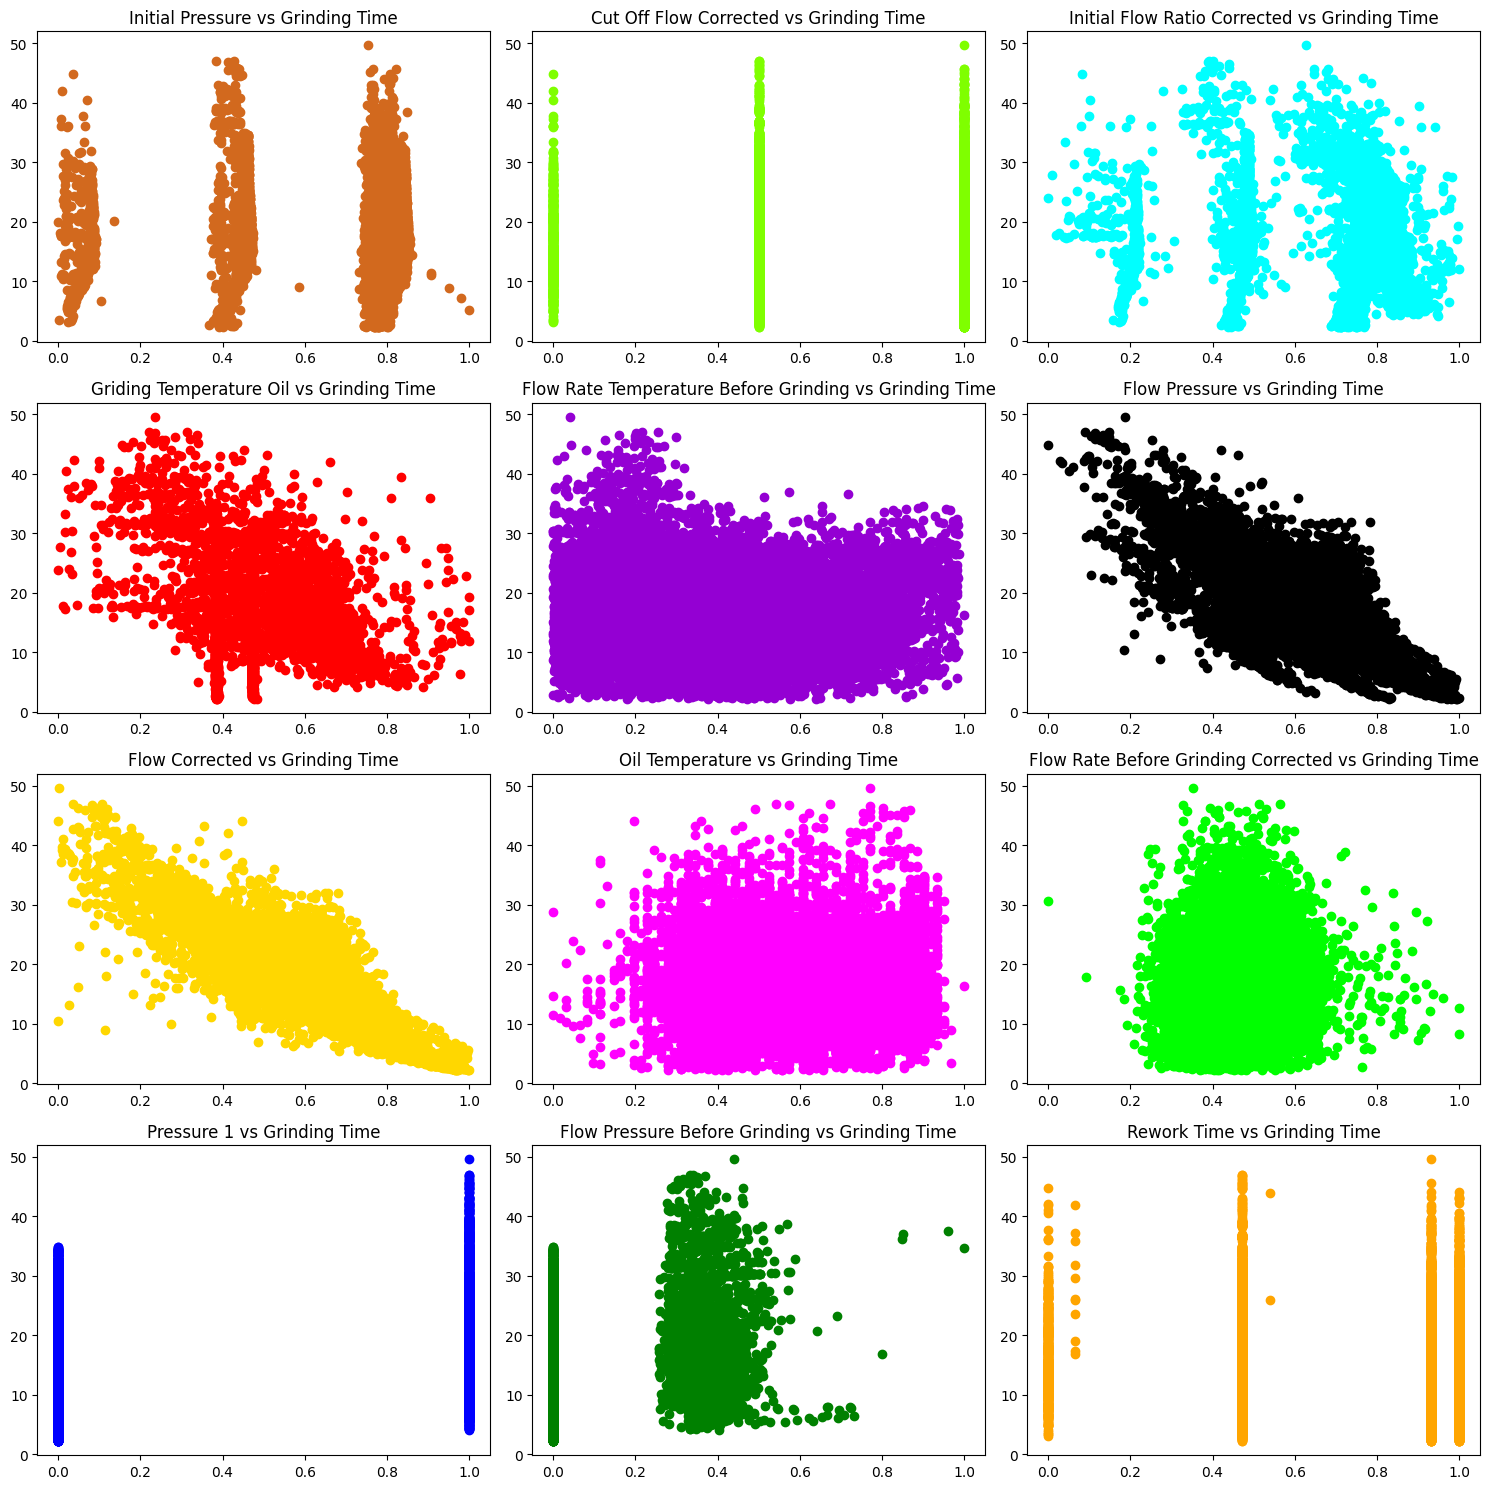

In [ ]:
#Spliting dataset in training and testing
X = df_no_outliers.drop(['Griding time'], axis=1)
y = df_no_outliers['Griding time']

# Transformar o y em vetor numpy
y = np.array(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from re import sub
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes[0,0].plot(X[:,1],y, 'o', color='chocolate')
axes[0,0].set_title('Initial Pressure vs Grinding Time')
axes[0,1].plot(X[:,2],y, 'o', color='chartreuse')
axes[0,1].set_title('Cut Off Flow Corrected vs Grinding Time')
axes[0,2].plot(X[:,4],y, 'o', color='aqua')
axes[0,2].set_title('Initial Flow Ratio Corrected vs Grinding Time')
axes[1,0].plot(X[:,5],y, 'o', color='red')
axes[1,0].set_title('Griding Temperature Oil vs Grinding Time')
axes[1,1].plot(X[:,12],y, 'o', color='darkviolet')
axes[1,1].set_title('Flow Rate Temperature Before Grinding vs Grinding Time')
axes[1,2].plot(X[:,7],y, 'o', color='black')
axes[1,2].set_title('Flow Pressure vs Grinding Time')
axes[2,0].plot(X[:,8],y, 'o', color='gold')
axes[2,0].set_title('Flow Corrected vs Grinding Time')
axes[2,1].plot(X[:,9],y, 'o', color='fuchsia')
axes[2,1].set_title('Oil Temperature vs Grinding Time')
axes[2,2].plot(X[:,11],y, 'o', color='lime')
axes[2,2].set_title('Flow Rate Before Grinding Corrected vs Grinding Time')
axes[3,0].plot(X[:,0],y, 'o', color='blue')
axes[3,0].set_title('Pressure 1 vs Grinding Time')
axes[3,1].plot(X[:,10],y, 'o', color='green')
axes[3,1].set_title('Flow Pressure Before Grinding vs Grinding Time')
axes[3,2].plot(X[:,6],y, 'o', color='orange')
axes[3,2].set_title('Rework Time vs Grinding Time')


plt.tight_layout()
plt.show

# Eliminar também: Initial Pressure, Oil temperature, Flow pressure before grinding.

In [ ]:
'''
#excluding the outlier from flow press and florr corr columns from df_no_outliers
Q1 = df_no_outliers['Flow Pressure'].quantile(0.25)
Q3 = df_no_outliers['Flow Pressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.75 * IQR

# Removing 'any(axis=1)' as it's not needed for Series and causing the error
df_no_outliers = df_no_outliers[~(df_no_outliers['Flow Pressure'] < lower_bound)]

Q1 = df_no_outliers['Flow Corrected'].quantile(0.25)
Q3 = df_no_outliers['Flow Corrected'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.75 * IQR

# Removing 'any(axis=1)' as it's not needed for Series and causing the error
df_no_outliers = df_no_outliers[~(df_no_outliers['Flow Corrected'] < lower_bound)]
'''

In [ ]:
# getting the maximun and minimum values of each columns of df_no_outliers
max_values = df_no_outliers.max()
min_values = df_no_outliers.min()

print("Máximos:")
print(max_values)

print("\nMínimos:")
print(min_values)

Máximos:
Flow Rate                                                              2.500000
Pressure 1                                                           112.616800
Pressure 1 Especification                                            110.000000
Initial Pressure                                                     112.232200
Cut off flow rate                                                    310.251700
C.o.f rate corrected                                                 295.949100
C.o.f rate especification                                            304.154600
Initial Flow Rate                                                    303.868600
I.F.R corrected                                                      289.984300
Griding time                                                          49.623000
Griding Temperature of Oil                                            33.200000
Rework Time                                                            4.675903
Flow Pressure                  

**Redes Neurais**
---



In [ ]:
#Excluding more features
df = df_no_outliers.copy()
df = df.drop(['Cut off flow rate', 'Initial Flow Rate', 'Flow Rate', 'Flow','flow rate before Grinding w/o back pressure','Pressure 1 Especification','Initial Pressure','Oil Temperature','Flow pressure before grinding w/o back pressure' ], axis=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16168 entries, 1 to 19442
Data columns (total 11 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Pressure 1                                                         16168 non-null  float64
 1   C.o.f rate corrected                                               16168 non-null  float64
 2   C.o.f rate especification                                          16168 non-null  float64
 3   I.F.R corrected                                                    16168 non-null  float64
 4   Griding time                                                       16168 non-null  float64
 5   Griding Temperature of Oil                                         16168 non-null  float64
 6   Rework Time                                                        16168 non-null  float64
 7   Flow Pressure              

,Pressure 1,C.o.f rate corrected,C.o.f rate especification,I.F.R corrected,Griding time,Griding Temperature of Oil,Rework Time,Flow Pressure,Flow Corrected,flow rate before grinding w/o back pressure- corrected,flow rate measuring temperature before grinding w/o back pressure
1,110.2617,289.0135,303.1057,279.0281,9.804,31.4,0.0,100.1036,289.2806,264.0800,39.32
2,110.3506,289.0167,303.1057,270.2075,11.505,30.6,0.0,100.0984,287.3397,249.8343,39.72
3,110.1836,289.0042,303.1057,279.3789,8.024,30.6,0.0,100.1296,287.4602,264.5579,40.00
4,109.6387,289.0170,303.1057,282.5582,5.563,30.5,0.0,100.1292,287.9584,266.8908,40.24
5,110.5021,289.0099,303.1057,276.4037,11.786,30.6,0.0,100.1332,287.5884,262.2392,40.34


<function matplotlib.pyplot.show(close=None, block=None)>

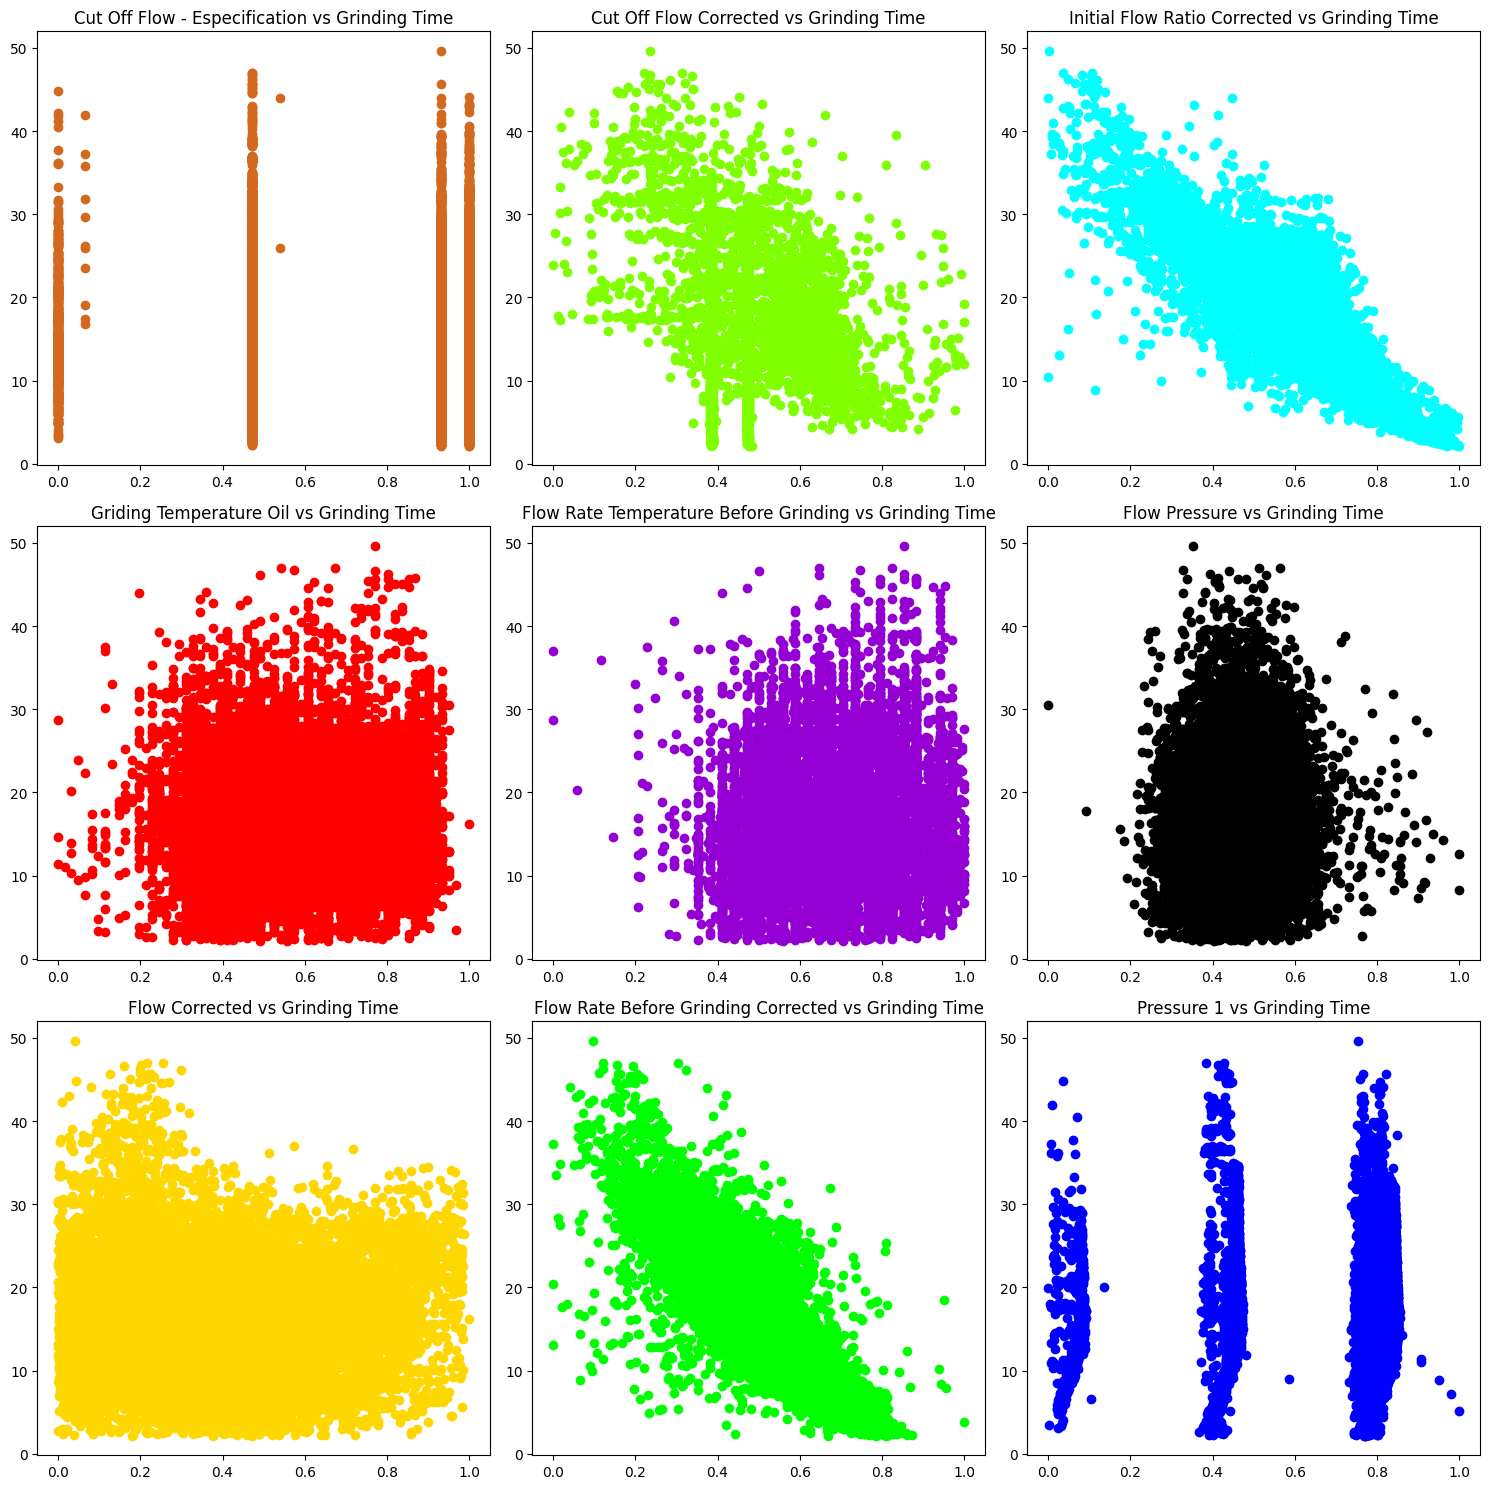

In [ ]:
#Spliting dataset in training and testing
X = df.drop(['Griding time'], axis=1)
y = df['Griding time']

# Transformar o y em vetor numpy
y = np.array(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from re import sub
import matplotlib.pyplot as plt
import numpy as np

# Create the subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes[0,0].plot(X[:,2],y, 'o', color='chocolate')
axes[0,0].set_title('Cut Off Flow - Especification vs Grinding Time')
axes[0,1].plot(X[:,1],y, 'o', color='chartreuse')
axes[0,1].set_title('Cut Off Flow Corrected vs Grinding Time')
axes[0,2].plot(X[:,3],y, 'o', color='aqua')
axes[0,2].set_title('Initial Flow Ratio Corrected vs Grinding Time')
axes[1,0].plot(X[:,4],y, 'o', color='red')
axes[1,0].set_title('Griding Temperature Oil vs Grinding Time')
axes[1,1].plot(X[:,9],y, 'o', color='darkviolet')
axes[1,1].set_title('Flow Rate Temperature Before Grinding vs Grinding Time')
axes[1,2].plot(X[:,6],y, 'o', color='black')
axes[1,2].set_title('Flow Pressure vs Grinding Time')
axes[2,0].plot(X[:,7],y, 'o', color='gold')
axes[2,0].set_title('Flow Corrected vs Grinding Time')
#axes[2,1].plot(X[:,9],y, 'o', color='fuchsia')
#axes[2,1].set_title('Oil Temperature vs Grinding Time')
axes[2,1].plot(X[:,8],y, 'o', color='lime')
axes[2,1].set_title('Flow Rate Before Grinding Corrected vs Grinding Time')
axes[2,2].plot(X[:,0],y, 'o', color='blue')
axes[2,2].set_title('Pressure 1 vs Grinding Time')
#axes[3,1].plot(X[:,10],y, 'o', color='green')
#axes[3,1].set_title('Flow Pressure Before Grinding vs Grinding Time')
#axes[3,2].plot(X[:,6],y, 'o', color='orange')
#axes[3,2].set_title('Rework Time vs Grinding Time')

plt.tight_layout()
plt.show

In [ ]:
#Spliting dataset in training and testing
X = df.drop(['Griding time','Rework Time'], axis=1)
y = df[['Griding time','Rework Time']]

# Transformar o y em vetor numpy
y = np.array(y)

# Converting rework time in 0 or 1
for i in range(len(y)):
  if y[i,1]>0:
    y[i,1] = 1
  else:
    y[i,1] = 0

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [ ]:
y_test.shape

(1617, 2)

In [ ]:
# Indentify proportion of zeros and ones in y_train
zero = 0
um = 0
for i in range(len(y_train[:,1])):
  if y_train[i,1]==0:
    zero = zero + 1
  else:
    um = um + 1
zero_percentil = (zero/len(y_train[:,1]))*100
um_percentil = (um/len(y_train[:,1]))*100
print(f'Percentual de zeros em treinamento: {zero_percentil}')
print(f'Percentual de uns em treinamento: {um_percentil}')

# Indentify proportion of zeros and ones in y_train
zero = 0
um = 0
for i in range(len(y_test[:,1])):
  if y_test[i,1]==0:
    zero = zero + 1
  else:
    um = um + 1
zero_percentil = (zero/len(y_test[:,1]))*100
um_percentil = (um/len(y_test[:,1]))*100
print(f'Percentual de zeros em teste: {zero_percentil}')
print(f'Percentual de uns em teste: {um_percentil}')

Percentual de zeros em treinamento: 84.8532746890248
Percentual de uns em treinamento: 15.14672531097519
Percentual de zeros em teste: 85.83797155225726
Percentual de uns em teste: 14.162028447742733


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

# Define a entrada do modelo
inputs = keras.Input(shape=(X_train.shape[1],))

# Define as camadas compartilhadas
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

# Define a saída de regressão
regression_output = layers.Dense(1, activation='linear', name='regression_output')(x)

# Define a saída de classificação
classification_output = layers.Dense(1, activation='sigmoid', name='classification_output')(x)

# Cria o modelo com duas saídas
model = keras.Model(inputs=inputs, outputs=[regression_output, classification_output])

# Define as métricas e funções de perda para cada saída
model.compile(
    optimizer='adam',
    loss={
        'regression_output': 'mse',
        'classification_output': 'binary_crossentropy'
    },
    loss_weights={
        'regression_output': 0.3,  # ou outro valor que você deseje
        'classification_output': 1.0
    },
    metrics={
        'regression_output': ['mae', 'mse'],
        'classification_output': ['accuracy', keras.metrics.AUC(name='AUC-PR', curve='PR')]
    }
)

# Treina o modelo com dois targets
history = model.fit(
    X_train, {'regression_output': y_train[:, 0], 'classification_output': y_train[:, 1]}, epochs=1000, validation_split=0.2, verbose=2, callbacks=[checkpoint])

# Avalia o modelo nos dados de teste
loss, regression_loss, classification_loss, regression_mae, regression_mse, classification_accuracy, classification_auc = model.evaluate(
    X_test,
    {'regression_output': y_test[:, 0], 'classification_output': y_test[:, 1]},
    verbose=2
)

Epoch 1/1000

Epoch 1: val_loss improved from inf to 11.44583, saving model to best_model.h5


364/364 - 4s - 12ms/step - classification_output_AUC-PR: 0.1584 - classification_output_accuracy: 0.7636 - classification_output_loss: 0.4704 - loss: 27.0780 - regression_output_loss: 88.6578 - regression_output_mae: 7.1474 - regression_output_mse: 88.6926 - val_classification_output_AUC-PR: 0.1538 - val_classification_output_accuracy: 0.8447 - val_classification_output_loss: 0.4385 - val_loss: 11.4458 - val_regression_output_loss: 36.6865 - val_regression_output_mae: 4.6495 - val_regression_output_mse: 36.6910
Epoch 2/1000

Epoch 2: val_loss improved from 11.44583 to 3.39820, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.1231 - classification_output_accuracy: 0.8495 - classification_output_loss: 0.4780 - loss: 5.8225 - regression_output_loss: 17.8192 - regression_output_mae: 3.1099 - regression_output_mse: 17.8157 - val_classification_output_AUC-PR: 0.1160 - val_classification_output_accuracy: 0.8447 - val_classification_output_loss: 0.4879 - val_loss: 3.3982 - val_regression_output_loss: 9.7003 - val_regression_output_mae: 2.2519 - val_regression_output_mse: 9.7007
Epoch 3/1000

Epoch 3: val_loss improved from 3.39820 to 2.64945, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.1668 - classification_output_accuracy: 0.8495 - classification_output_loss: 0.4313 - loss: 3.1657 - regression_output_loss: 9.1272 - regression_output_mae: 2.1122 - regression_output_mse: 9.1146 - val_classification_output_AUC-PR: 0.4219 - val_classification_output_accuracy: 0.8447 - val_classification_output_loss: 0.3985 - val_loss: 2.6495 - val_regression_output_loss: 7.5030 - val_regression_output_mae: 1.9191 - val_regression_output_mse: 7.5032
Epoch 4/1000

Epoch 4: val_loss improved from 2.64945 to 2.38672, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.3933 - classification_output_accuracy: 0.8570 - classification_output_loss: 0.3803 - loss: 2.7602 - regression_output_loss: 7.9296 - regression_output_mae: 1.9110 - regression_output_mse: 7.9328 - val_classification_output_AUC-PR: 0.4602 - val_classification_output_accuracy: 0.8622 - val_classification_output_loss: 0.3757 - val_loss: 2.3867 - val_regression_output_loss: 6.7033 - val_regression_output_mae: 1.7806 - val_regression_output_mse: 6.7034
Epoch 5/1000

Epoch 5: val_loss improved from 2.38672 to 2.33976, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.4596 - classification_output_accuracy: 0.8638 - classification_output_loss: 0.3599 - loss: 2.5398 - regression_output_loss: 7.2659 - regression_output_mae: 1.8052 - regression_output_mse: 7.2659 - val_classification_output_AUC-PR: 0.5258 - val_classification_output_accuracy: 0.8516 - val_classification_output_loss: 0.3621 - val_loss: 2.3398 - val_regression_output_loss: 6.5920 - val_regression_output_mae: 1.8227 - val_regression_output_mse: 6.5919
Epoch 6/1000

Epoch 6: val_loss improved from 2.33976 to 2.23067, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.5178 - classification_output_accuracy: 0.8666 - classification_output_loss: 0.3365 - loss: 2.4229 - regression_output_loss: 6.9557 - regression_output_mae: 1.7688 - regression_output_mse: 6.9546 - val_classification_output_AUC-PR: 0.5701 - val_classification_output_accuracy: 0.8729 - val_classification_output_loss: 0.3362 - val_loss: 2.2307 - val_regression_output_loss: 6.3152 - val_regression_output_mae: 1.7661 - val_regression_output_mse: 6.3150
Epoch 7/1000

Epoch 7: val_loss improved from 2.23067 to 2.20272, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.5834 - classification_output_accuracy: 0.8729 - classification_output_loss: 0.3075 - loss: 2.3469 - regression_output_loss: 6.7979 - regression_output_mae: 1.7520 - regression_output_mse: 6.7977 - val_classification_output_AUC-PR: 0.6533 - val_classification_output_accuracy: 0.8853 - val_classification_output_loss: 0.2946 - val_loss: 2.2027 - val_regression_output_loss: 6.3606 - val_regression_output_mae: 1.8138 - val_regression_output_mse: 6.3604
Epoch 8/1000

Epoch 8: val_loss improved from 2.20272 to 2.09015, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.6306 - classification_output_accuracy: 0.8795 - classification_output_loss: 0.2802 - loss: 2.2564 - regression_output_loss: 6.5838 - regression_output_mae: 1.7171 - regression_output_mse: 6.5870 - val_classification_output_AUC-PR: 0.7048 - val_classification_output_accuracy: 0.8973 - val_classification_output_loss: 0.2722 - val_loss: 2.0902 - val_regression_output_loss: 6.0600 - val_regression_output_mae: 1.7303 - val_regression_output_mse: 6.0600
Epoch 9/1000

Epoch 9: val_loss improved from 2.09015 to 1.98316, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.6866 - classification_output_accuracy: 0.8930 - classification_output_loss: 0.2536 - loss: 2.1918 - regression_output_loss: 6.4583 - regression_output_mae: 1.6990 - regression_output_mse: 6.4602 - val_classification_output_AUC-PR: 0.7609 - val_classification_output_accuracy: 0.9042 - val_classification_output_loss: 0.2369 - val_loss: 1.9832 - val_regression_output_loss: 5.8208 - val_regression_output_mae: 1.6547 - val_regression_output_mse: 5.8207
Epoch 10/1000

Epoch 10: val_loss did not improve from 1.98316
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.7426 - classification_output_accuracy: 0.9042 - classification_output_loss: 0.2307 - loss: 2.1428 - regression_output_loss: 6.3937 - regression_output_mae: 1.6897 - regression_output_mse: 6.3738 - val_classification_output_AUC-PR: 0.8079 - val_classification_output_accuracy: 0.9155 - val_classification_output_loss: 0.2142 - val_loss: 2.0421 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.7941 - classification_output_accuracy: 0.9174 - classification_output_loss: 0.2102 - loss: 2.1179 - regression_output_loss: 6.3564 - regression_output_mae: 1.6869 - regression_output_mse: 6.3589 - val_classification_output_AUC-PR: 0.8548 - val_classification_output_accuracy: 0.9255 - val_classification_output_loss: 0.1917 - val_loss: 1.9463 - val_regression_output_loss: 5.8484 - val_regression_output_mae: 1.6231 - val_regression_output_mse: 5.8487
Epoch 12/1000

Epoch 12: val_loss improved from 1.94629 to 1.86877, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.8424 - classification_output_accuracy: 0.9300 - classification_output_loss: 0.1883 - loss: 2.0735 - regression_output_loss: 6.2830 - regression_output_mae: 1.6806 - regression_output_mse: 6.2840 - val_classification_output_AUC-PR: 0.8853 - val_classification_output_accuracy: 0.9426 - val_classification_output_loss: 0.1752 - val_loss: 1.8688 - val_regression_output_loss: 5.6453 - val_regression_output_mae: 1.6337 - val_regression_output_mse: 5.6451
Epoch 13/1000

Epoch 13: val_loss improved from 1.86877 to 1.81836, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.8685 - classification_output_accuracy: 0.9379 - classification_output_loss: 0.1719 - loss: 2.0099 - regression_output_loss: 6.1306 - regression_output_mae: 1.6512 - regression_output_mse: 6.1268 - val_classification_output_AUC-PR: 0.9070 - val_classification_output_accuracy: 0.9502 - val_classification_output_loss: 0.1530 - val_loss: 1.8184 - val_regression_output_loss: 5.5512 - val_regression_output_mae: 1.5641 - val_regression_output_mse: 5.5512
Epoch 14/1000

Epoch 14: val_loss did not improve from 1.81836
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.8955 - classification_output_accuracy: 0.9502 - classification_output_loss: 0.1535 - loss: 1.9738 - regression_output_loss: 6.0684 - regression_output_mae: 1.6433 - regression_output_mse: 6.0674 - val_classification_output_AUC-PR: 0.9207 - val_classification_output_accuracy: 0.9564 - val_classification_output_loss: 0.1398 - val_loss: 1.8588 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9162 - classification_output_accuracy: 0.9576 - classification_output_loss: 0.1333 - loss: 1.9084 - regression_output_loss: 5.9151 - regression_output_mae: 1.6175 - regression_output_mse: 5.9173 - val_classification_output_AUC-PR: 0.9271 - val_classification_output_accuracy: 0.9619 - val_classification_output_loss: 0.1282 - val_loss: 1.7734 - val_regression_output_loss: 5.4838 - val_regression_output_mae: 1.5419 - val_regression_output_mse: 5.4839
Epoch 17/1000

Epoch 17: val_loss did not improve from 1.77337
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9201 - classification_output_accuracy: 0.9597 - classification_output_loss: 0.1283 - loss: 1.8751 - regression_output_loss: 5.8233 - regression_output_mae: 1.5977 - regression_output_mse: 5.8229 - val_classification_output_AUC-PR: 0.9336 - val_classification_output_accuracy: 0.9636 - val_classification_output_loss: 0.1191 - val_loss: 1.8377 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9222 - classification_output_accuracy: 0.9607 - classification_output_loss: 0.1246 - loss: 1.8557 - regression_output_loss: 5.7696 - regression_output_mae: 1.5947 - regression_output_mse: 5.7708 - val_classification_output_AUC-PR: 0.9366 - val_classification_output_accuracy: 0.9636 - val_classification_output_loss: 0.1156 - val_loss: 1.7073 - val_regression_output_loss: 5.3056 - val_regression_output_mae: 1.5235 - val_regression_output_mse: 5.3056
Epoch 19/1000

Epoch 19: val_loss improved from 1.70728 to 1.69934, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9276 - classification_output_accuracy: 0.9643 - classification_output_loss: 0.1188 - loss: 1.8227 - regression_output_loss: 5.6779 - regression_output_mae: 1.5768 - regression_output_mse: 5.6794 - val_classification_output_AUC-PR: 0.9369 - val_classification_output_accuracy: 0.9632 - val_classification_output_loss: 0.1140 - val_loss: 1.6993 - val_regression_output_loss: 5.2843 - val_regression_output_mae: 1.5131 - val_regression_output_mse: 5.2844
Epoch 20/1000

Epoch 20: val_loss improved from 1.69934 to 1.67528, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9284 - classification_output_accuracy: 0.9647 - classification_output_loss: 0.1169 - loss: 1.7900 - regression_output_loss: 5.5766 - regression_output_mae: 1.5523 - regression_output_mse: 5.5770 - val_classification_output_AUC-PR: 0.9410 - val_classification_output_accuracy: 0.9670 - val_classification_output_loss: 0.1082 - val_loss: 1.6753 - val_regression_output_loss: 5.2240 - val_regression_output_mae: 1.5167 - val_regression_output_mse: 5.2235
Epoch 21/1000

Epoch 21: val_loss did not improve from 1.67528
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9311 - classification_output_accuracy: 0.9662 - classification_output_loss: 0.1141 - loss: 1.7754 - regression_output_loss: 5.5363 - regression_output_mae: 1.5465 - regression_output_mse: 5.5377 - val_classification_output_AUC-PR: 0.9425 - val_classification_output_accuracy: 0.9674 - val_classification_output_loss: 0.1073 - val_loss: 1.7610 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9325 - classification_output_accuracy: 0.9656 - classification_output_loss: 0.1128 - loss: 1.7961 - regression_output_loss: 5.6092 - regression_output_mae: 1.5673 - regression_output_mse: 5.6108 - val_classification_output_AUC-PR: 0.9424 - val_classification_output_accuracy: 0.9674 - val_classification_output_loss: 0.1063 - val_loss: 1.6643 - val_regression_output_loss: 5.1935 - val_regression_output_mae: 1.5038 - val_regression_output_mse: 5.1934
Epoch 23/1000

Epoch 23: val_loss improved from 1.66427 to 1.63802, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9354 - classification_output_accuracy: 0.9682 - classification_output_loss: 0.1086 - loss: 1.7503 - regression_output_loss: 5.4708 - regression_output_mae: 1.5405 - regression_output_mse: 5.4720 - val_classification_output_AUC-PR: 0.9422 - val_classification_output_accuracy: 0.9677 - val_classification_output_loss: 0.1136 - val_loss: 1.6380 - val_regression_output_loss: 5.0818 - val_regression_output_mae: 1.4703 - val_regression_output_mse: 5.0815
Epoch 24/1000

Epoch 24: val_loss did not improve from 1.63802
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9321 - classification_output_accuracy: 0.9679 - classification_output_loss: 0.1111 - loss: 1.7456 - regression_output_loss: 5.4469 - regression_output_mae: 1.5389 - regression_output_mse: 5.4480 - val_classification_output_AUC-PR: 0.9400 - val_classification_output_accuracy: 0.9639 - val_classification_output_loss: 0.1144 - val_loss: 1.6626 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9385 - classification_output_accuracy: 0.9698 - classification_output_loss: 0.1049 - loss: 1.6876 - regression_output_loss: 5.2744 - regression_output_mae: 1.5067 - regression_output_mse: 5.2756 - val_classification_output_AUC-PR: 0.9472 - val_classification_output_accuracy: 0.9722 - val_classification_output_loss: 0.0970 - val_loss: 1.6069 - val_regression_output_loss: 5.0338 - val_regression_output_mae: 1.4719 - val_regression_output_mse: 5.0333
Epoch 28/1000

Epoch 28: val_loss improved from 1.60694 to 1.59030, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9382 - classification_output_accuracy: 0.9703 - classification_output_loss: 0.1033 - loss: 1.6877 - regression_output_loss: 5.2799 - regression_output_mae: 1.5088 - regression_output_mse: 5.2811 - val_classification_output_AUC-PR: 0.9476 - val_classification_output_accuracy: 0.9739 - val_classification_output_loss: 0.0989 - val_loss: 1.5903 - val_regression_output_loss: 4.9716 - val_regression_output_mae: 1.4468 - val_regression_output_mse: 4.9714
Epoch 29/1000

Epoch 29: val_loss did not improve from 1.59030
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9419 - classification_output_accuracy: 0.9703 - classification_output_loss: 0.1011 - loss: 1.6459 - regression_output_loss: 5.1487 - regression_output_mae: 1.4784 - regression_output_mse: 5.1492 - val_classification_output_AUC-PR: 0.9478 - val_classification_output_accuracy: 0.9708 - val_classification_output_loss: 0.0990 - val_loss: 1.6184 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9401 - classification_output_accuracy: 0.9707 - classification_output_loss: 0.1023 - loss: 1.6731 - regression_output_loss: 5.2355 - regression_output_mae: 1.5082 - regression_output_mse: 5.2365 - val_classification_output_AUC-PR: 0.9488 - val_classification_output_accuracy: 0.9735 - val_classification_output_loss: 0.0956 - val_loss: 1.5856 - val_regression_output_loss: 4.9671 - val_regression_output_mae: 1.4714 - val_regression_output_mse: 4.9665
Epoch 31/1000

Epoch 31: val_loss did not improve from 1.58556
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9383 - classification_output_accuracy: 0.9696 - classification_output_loss: 0.1034 - loss: 1.6697 - regression_output_loss: 5.2196 - regression_output_mae: 1.4978 - regression_output_mse: 5.2215 - val_classification_output_AUC-PR: 0.9482 - val_classification_output_accuracy: 0.9749 - val_classification_output_loss: 0.0961 - val_loss: 1.5996 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9420 - classification_output_accuracy: 0.9713 - classification_output_loss: 0.0998 - loss: 1.6415 - regression_output_loss: 5.1398 - regression_output_mae: 1.4853 - regression_output_mse: 5.1391 - val_classification_output_AUC-PR: 0.9481 - val_classification_output_accuracy: 0.9705 - val_classification_output_loss: 0.0969 - val_loss: 1.5526 - val_regression_output_loss: 4.8526 - val_regression_output_mae: 1.4441 - val_regression_output_mse: 4.8523
Epoch 33/1000

Epoch 33: val_loss improved from 1.55257 to 1.54467, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9417 - classification_output_accuracy: 0.9726 - classification_output_loss: 0.0996 - loss: 1.6203 - regression_output_loss: 5.0685 - regression_output_mae: 1.4697 - regression_output_mse: 5.0695 - val_classification_output_AUC-PR: 0.9484 - val_classification_output_accuracy: 0.9725 - val_classification_output_loss: 0.0955 - val_loss: 1.5447 - val_regression_output_loss: 4.8313 - val_regression_output_mae: 1.4440 - val_regression_output_mse: 4.8308
Epoch 34/1000

Epoch 34: val_loss did not improve from 1.54467
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9432 - classification_output_accuracy: 0.9724 - classification_output_loss: 0.0977 - loss: 1.6174 - regression_output_loss: 5.0641 - regression_output_mae: 1.4789 - regression_output_mse: 5.0653 - val_classification_output_AUC-PR: 0.9477 - val_classification_output_accuracy: 0.9677 - val_classification_output_loss: 0.1053 - val_loss: 1.5750 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9424 - classification_output_accuracy: 0.9724 - classification_output_loss: 0.0982 - loss: 1.6087 - regression_output_loss: 5.0336 - regression_output_mae: 1.4681 - regression_output_mse: 5.0348 - val_classification_output_AUC-PR: 0.9507 - val_classification_output_accuracy: 0.9780 - val_classification_output_loss: 0.0935 - val_loss: 1.5292 - val_regression_output_loss: 4.7861 - val_regression_output_mae: 1.4173 - val_regression_output_mse: 4.7856
Epoch 36/1000

Epoch 36: val_loss did not improve from 1.52918
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9432 - classification_output_accuracy: 0.9739 - classification_output_loss: 0.0967 - loss: 1.5954 - regression_output_loss: 4.9952 - regression_output_mae: 1.4623 - regression_output_mse: 4.9955 - val_classification_output_AUC-PR: 0.9514 - val_classification_output_accuracy: 0.9777 - val_classification_output_loss: 0.1000 - val_loss: 1.5301 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9451 - classification_output_accuracy: 0.9729 - classification_output_loss: 0.0947 - loss: 1.5576 - regression_output_loss: 4.8749 - regression_output_mae: 1.4394 - regression_output_mse: 4.8763 - val_classification_output_AUC-PR: 0.9516 - val_classification_output_accuracy: 0.9749 - val_classification_output_loss: 0.0889 - val_loss: 1.4897 - val_regression_output_loss: 4.6698 - val_regression_output_mae: 1.3803 - val_regression_output_mse: 4.6694
Epoch 40/1000

Epoch 40: val_loss did not improve from 1.48966
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9452 - classification_output_accuracy: 0.9735 - classification_output_loss: 0.0946 - loss: 1.5388 - regression_output_loss: 4.8138 - regression_output_mae: 1.4323 - regression_output_mse: 4.8139 - val_classification_output_AUC-PR: 0.9515 - val_classification_output_accuracy: 0.9760 - val_classification_output_loss: 0.0900 - val_loss: 1.5413 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9448 - classification_output_accuracy: 0.9731 - classification_output_loss: 0.0944 - loss: 1.5328 - regression_output_loss: 4.7926 - regression_output_mae: 1.4286 - regression_output_mse: 4.7946 - val_classification_output_AUC-PR: 0.9517 - val_classification_output_accuracy: 0.9773 - val_classification_output_loss: 0.0889 - val_loss: 1.4764 - val_regression_output_loss: 4.6253 - val_regression_output_mae: 1.3802 - val_regression_output_mse: 4.6250
Epoch 42/1000

Epoch 42: val_loss did not improve from 1.47642
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9452 - classification_output_accuracy: 0.9746 - classification_output_loss: 0.0940 - loss: 1.5275 - regression_output_loss: 4.7766 - regression_output_mae: 1.4338 - regression_output_mse: 4.7781 - val_classification_output_AUC-PR: 0.9514 - val_classification_output_accuracy: 0.9760 - val_classification_output_loss: 0.0891 - val_loss: 1.4839 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9462 - classification_output_accuracy: 0.9741 - classification_output_loss: 0.0934 - loss: 1.5211 - regression_output_loss: 4.7560 - regression_output_mae: 1.4224 - regression_output_mse: 4.7587 - val_classification_output_AUC-PR: 0.9539 - val_classification_output_accuracy: 0.9777 - val_classification_output_loss: 0.0855 - val_loss: 1.4565 - val_regression_output_loss: 4.5704 - val_regression_output_mae: 1.3779 - val_regression_output_mse: 4.5700
Epoch 44/1000

Epoch 44: val_loss improved from 1.45648 to 1.44435, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9460 - classification_output_accuracy: 0.9740 - classification_output_loss: 0.0941 - loss: 1.5355 - regression_output_loss: 4.8020 - regression_output_mae: 1.4464 - regression_output_mse: 4.8044 - val_classification_output_AUC-PR: 0.9541 - val_classification_output_accuracy: 0.9780 - val_classification_output_loss: 0.0861 - val_loss: 1.4444 - val_regression_output_loss: 4.5281 - val_regression_output_mae: 1.3709 - val_regression_output_mse: 4.5276
Epoch 45/1000

Epoch 45: val_loss did not improve from 1.44435
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9495 - classification_output_accuracy: 0.9748 - classification_output_loss: 0.0897 - loss: 1.4808 - regression_output_loss: 4.6359 - regression_output_mae: 1.4102 - regression_output_mse: 4.6369 - val_classification_output_AUC-PR: 0.9533 - val_classification_output_accuracy: 0.9749 - val_classification_output_loss: 0.0865 - val_loss: 1.6412 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9517 - classification_output_accuracy: 0.9752 - classification_output_loss: 0.0876 - loss: 1.4665 - regression_output_loss: 4.5968 - regression_output_mae: 1.4049 - regression_output_mse: 4.5967 - val_classification_output_AUC-PR: 0.9570 - val_classification_output_accuracy: 0.9770 - val_classification_output_loss: 0.0838 - val_loss: 1.4068 - val_regression_output_loss: 4.4104 - val_regression_output_mae: 1.3443 - val_regression_output_mse: 4.4100
Epoch 49/1000

Epoch 49: val_loss did not improve from 1.40677
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9513 - classification_output_accuracy: 0.9750 - classification_output_loss: 0.0884 - loss: 1.4676 - regression_output_loss: 4.5968 - regression_output_mae: 1.4083 - regression_output_mse: 4.5972 - val_classification_output_AUC-PR: 0.9574 - val_classification_output_accuracy: 0.9794 - val_classification_output_loss: 0.0808 - val_loss: 1.4130 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9520 - classification_output_accuracy: 0.9747 - classification_output_loss: 0.0871 - loss: 1.4393 - regression_output_loss: 4.5118 - regression_output_mae: 1.3989 - regression_output_mse: 4.5077 - val_classification_output_AUC-PR: 0.9584 - val_classification_output_accuracy: 0.9773 - val_classification_output_loss: 0.0894 - val_loss: 1.3985 - val_regression_output_loss: 4.3644 - val_regression_output_mae: 1.3366 - val_regression_output_mse: 4.3640
Epoch 52/1000

Epoch 52: val_loss did not improve from 1.39852
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9540 - classification_output_accuracy: 0.9749 - classification_output_loss: 0.0852 - loss: 1.4129 - regression_output_loss: 4.4249 - regression_output_mae: 1.3772 - regression_output_mse: 4.4256 - val_classification_output_AUC-PR: 0.9594 - val_classification_output_accuracy: 0.9777 - val_classification_output_loss: 0.0787 - val_loss: 1.4651 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9558 - classification_output_accuracy: 0.9761 - classification_output_loss: 0.0826 - loss: 1.4300 - regression_output_loss: 4.4898 - regression_output_mae: 1.3960 - regression_output_mse: 4.4910 - val_classification_output_AUC-PR: 0.9590 - val_classification_output_accuracy: 0.9753 - val_classification_output_loss: 0.0806 - val_loss: 1.3814 - val_regression_output_loss: 4.3367 - val_regression_output_mae: 1.3618 - val_regression_output_mse: 4.3362
Epoch 54/1000

Epoch 54: val_loss did not improve from 1.38145
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9577 - classification_output_accuracy: 0.9777 - classification_output_loss: 0.0806 - loss: 1.3985 - regression_output_loss: 4.3957 - regression_output_mae: 1.3696 - regression_output_mse: 4.3931 - val_classification_output_AUC-PR: 0.9587 - val_classification_output_accuracy: 0.9787 - val_classification_output_loss: 0.0822 - val_loss: 1.3903 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9604 - classification_output_accuracy: 0.9777 - classification_output_loss: 0.0783 - loss: 1.3798 - regression_output_loss: 4.3369 - regression_output_mae: 1.3757 - regression_output_mse: 4.3382 - val_classification_output_AUC-PR: 0.9654 - val_classification_output_accuracy: 0.9777 - val_classification_output_loss: 0.0753 - val_loss: 1.3486 - val_regression_output_loss: 4.2451 - val_regression_output_mae: 1.3364 - val_regression_output_mse: 4.2445
Epoch 58/1000

Epoch 58: val_loss did not improve from 1.34858
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9625 - classification_output_accuracy: 0.9787 - classification_output_loss: 0.0752 - loss: 1.3643 - regression_output_loss: 4.2990 - regression_output_mae: 1.3644 - regression_output_mse: 4.2969 - val_classification_output_AUC-PR: 0.9642 - val_classification_output_accuracy: 0.9787 - val_classification_output_loss: 0.0745 - val_loss: 1.3970 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9637 - classification_output_accuracy: 0.9783 - classification_output_loss: 0.0733 - loss: 1.3516 - regression_output_loss: 4.2600 - regression_output_mae: 1.3605 - regression_output_mse: 4.2611 - val_classification_output_AUC-PR: 0.9634 - val_classification_output_accuracy: 0.9773 - val_classification_output_loss: 0.0756 - val_loss: 1.3356 - val_regression_output_loss: 4.2005 - val_regression_output_mae: 1.3265 - val_regression_output_mse: 4.2001
Epoch 61/1000

Epoch 61: val_loss did not improve from 1.33563
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9613 - classification_output_accuracy: 0.9790 - classification_output_loss: 0.0760 - loss: 1.3499 - regression_output_loss: 4.2449 - regression_output_mae: 1.3597 - regression_output_mse: 4.2463 - val_classification_output_AUC-PR: 0.9647 - val_classification_output_accuracy: 0.9766 - val_classification_output_loss: 0.0827 - val_loss: 1.4312 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9661 - classification_output_accuracy: 0.9802 - classification_output_loss: 0.0712 - loss: 1.3167 - regression_output_loss: 4.1490 - regression_output_mae: 1.3367 - regression_output_mse: 4.1514 - val_classification_output_AUC-PR: 0.9681 - val_classification_output_accuracy: 0.9801 - val_classification_output_loss: 0.0693 - val_loss: 1.3227 - val_regression_output_loss: 4.1791 - val_regression_output_mae: 1.3286 - val_regression_output_mse: 4.1782
Epoch 65/1000

Epoch 65: val_loss did not improve from 1.32272
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9672 - classification_output_accuracy: 0.9804 - classification_output_loss: 0.0684 - loss: 1.3259 - regression_output_loss: 4.1945 - regression_output_mae: 1.3463 - regression_output_mse: 4.1916 - val_classification_output_AUC-PR: 0.9666 - val_classification_output_accuracy: 0.9835 - val_classification_output_loss: 0.0723 - val_loss: 1.3241 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9673 - classification_output_accuracy: 0.9810 - classification_output_loss: 0.0691 - loss: 1.3178 - regression_output_loss: 4.1609 - regression_output_mae: 1.3486 - regression_output_mse: 4.1622 - val_classification_output_AUC-PR: 0.9687 - val_classification_output_accuracy: 0.9801 - val_classification_output_loss: 0.0711 - val_loss: 1.2993 - val_regression_output_loss: 4.0946 - val_regression_output_mae: 1.2943 - val_regression_output_mse: 4.0940
Epoch 67/1000

Epoch 67: val_loss did not improve from 1.29928
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9685 - classification_output_accuracy: 0.9813 - classification_output_loss: 0.0672 - loss: 1.3084 - regression_output_loss: 4.1359 - regression_output_mae: 1.3432 - regression_output_mse: 4.1372 - val_classification_output_AUC-PR: 0.9681 - val_classification_output_accuracy: 0.9794 - val_classification_output_loss: 0.0744 - val_loss: 1.3021 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9720 - classification_output_accuracy: 0.9819 - classification_output_loss: 0.0624 - loss: 1.2847 - regression_output_loss: 4.0748 - regression_output_mae: 1.3289 - regression_output_mse: 4.0740 - val_classification_output_AUC-PR: 0.9731 - val_classification_output_accuracy: 0.9804 - val_classification_output_loss: 0.0638 - val_loss: 1.2976 - val_regression_output_loss: 4.1136 - val_regression_output_mae: 1.3359 - val_regression_output_mse: 4.1128
Epoch 75/1000

Epoch 75: val_loss did not improve from 1.29758
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9722 - classification_output_accuracy: 0.9834 - classification_output_loss: 0.0612 - loss: 1.2769 - regression_output_loss: 4.0516 - regression_output_mae: 1.3251 - regression_output_mse: 4.0526 - val_classification_output_AUC-PR: 0.9725 - val_classification_output_accuracy: 0.9818 - val_classification_output_loss: 0.0637 - val_loss: 1.3256 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9723 - classification_output_accuracy: 0.9821 - classification_output_loss: 0.0618 - loss: 1.2882 - regression_output_loss: 4.0889 - regression_output_mae: 1.3357 - regression_output_mse: 4.0880 - val_classification_output_AUC-PR: 0.9748 - val_classification_output_accuracy: 0.9825 - val_classification_output_loss: 0.0606 - val_loss: 1.2794 - val_regression_output_loss: 4.0636 - val_regression_output_mae: 1.3253 - val_regression_output_mse: 4.0629
Epoch 77/1000

Epoch 77: val_loss did not improve from 1.27945
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9733 - classification_output_accuracy: 0.9837 - classification_output_loss: 0.0605 - loss: 1.2691 - regression_output_loss: 4.0307 - regression_output_mae: 1.3184 - regression_output_mse: 4.0291 - val_classification_output_AUC-PR: 0.9742 - val_classification_output_accuracy: 0.9818 - val_classification_output_loss: 0.0609 - val_loss: 1.2847 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9741 - classification_output_accuracy: 0.9833 - classification_output_loss: 0.0598 - loss: 1.2798 - regression_output_loss: 4.0659 - regression_output_mae: 1.3343 - regression_output_mse: 4.0670 - val_classification_output_AUC-PR: 0.9767 - val_classification_output_accuracy: 0.9839 - val_classification_output_loss: 0.0581 - val_loss: 1.2746 - val_regression_output_loss: 4.0555 - val_regression_output_mae: 1.2802 - val_regression_output_mse: 4.0550
Epoch 81/1000

Epoch 81: val_loss improved from 1.27461 to 1.26980, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9729 - classification_output_accuracy: 0.9845 - classification_output_loss: 0.0592 - loss: 1.2716 - regression_output_loss: 4.0425 - regression_output_mae: 1.3331 - regression_output_mse: 4.0413 - val_classification_output_AUC-PR: 0.9745 - val_classification_output_accuracy: 0.9828 - val_classification_output_loss: 0.0609 - val_loss: 1.2698 - val_regression_output_loss: 4.0305 - val_regression_output_mae: 1.2807 - val_regression_output_mse: 4.0298
Epoch 82/1000

Epoch 82: val_loss improved from 1.26980 to 1.26768, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9736 - classification_output_accuracy: 0.9851 - classification_output_loss: 0.0577 - loss: 1.2593 - regression_output_loss: 4.0047 - regression_output_mae: 1.3200 - regression_output_mse: 4.0051 - val_classification_output_AUC-PR: 0.9748 - val_classification_output_accuracy: 0.9814 - val_classification_output_loss: 0.0618 - val_loss: 1.2677 - val_regression_output_loss: 4.0202 - val_regression_output_mae: 1.2871 - val_regression_output_mse: 4.0195
Epoch 83/1000

Epoch 83: val_loss improved from 1.26768 to 1.25055, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9725 - classification_output_accuracy: 0.9845 - classification_output_loss: 0.0609 - loss: 1.2825 - regression_output_loss: 4.0708 - regression_output_mae: 1.3327 - regression_output_mse: 4.0720 - val_classification_output_AUC-PR: 0.9758 - val_classification_output_accuracy: 0.9835 - val_classification_output_loss: 0.0583 - val_loss: 1.2506 - val_regression_output_loss: 3.9750 - val_regression_output_mae: 1.2946 - val_regression_output_mse: 3.9742
Epoch 84/1000

Epoch 84: val_loss did not improve from 1.25055
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9754 - classification_output_accuracy: 0.9857 - classification_output_loss: 0.0565 - loss: 1.2462 - regression_output_loss: 3.9662 - regression_output_mae: 1.3114 - regression_output_mse: 3.9655 - val_classification_output_AUC-PR: 0.9767 - val_classification_output_accuracy: 0.9839 - val_classification_output_loss: 0.0560 - val_loss: 1.3369 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9751 - classification_output_accuracy: 0.9848 - classification_output_loss: 0.0561 - loss: 1.2551 - regression_output_loss: 3.9963 - regression_output_mae: 1.3236 - regression_output_mse: 3.9965 - val_classification_output_AUC-PR: 0.9761 - val_classification_output_accuracy: 0.9825 - val_classification_output_loss: 0.0592 - val_loss: 1.2449 - val_regression_output_loss: 3.9529 - val_regression_output_mae: 1.2830 - val_regression_output_mse: 3.9522
Epoch 88/1000

Epoch 88: val_loss did not improve from 1.24487
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9746 - classification_output_accuracy: 0.9851 - classification_output_loss: 0.0558 - loss: 1.2649 - regression_output_loss: 4.0317 - regression_output_mae: 1.3279 - regression_output_mse: 4.0301 - val_classification_output_AUC-PR: 0.9775 - val_classification_output_accuracy: 0.9852 - val_classification_output_loss: 0.0551 - val_loss: 1.2714 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9766 - classification_output_accuracy: 0.9861 - classification_output_loss: 0.0539 - loss: 1.2388 - regression_output_loss: 3.9495 - regression_output_mae: 1.3102 - regression_output_mse: 3.9504 - val_classification_output_AUC-PR: 0.9771 - val_classification_output_accuracy: 0.9821 - val_classification_output_loss: 0.0618 - val_loss: 1.2311 - val_regression_output_loss: 3.8985 - val_regression_output_mae: 1.2655 - val_regression_output_mse: 3.8978
Epoch 92/1000

Epoch 92: val_loss did not improve from 1.23110
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9769 - classification_output_accuracy: 0.9863 - classification_output_loss: 0.0529 - loss: 1.2516 - regression_output_loss: 3.9935 - regression_output_mae: 1.3320 - regression_output_mse: 3.9956 - val_classification_output_AUC-PR: 0.9759 - val_classification_output_accuracy: 0.9845 - val_classification_output_loss: 0.0577 - val_loss: 1.3720 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9764 - classification_output_accuracy: 0.9863 - classification_output_loss: 0.0529 - loss: 1.2078 - regression_output_loss: 3.8500 - regression_output_mae: 1.2937 - regression_output_mse: 3.8499 - val_classification_output_AUC-PR: 0.9797 - val_classification_output_accuracy: 0.9842 - val_classification_output_loss: 0.0543 - val_loss: 1.2174 - val_regression_output_loss: 3.8778 - val_regression_output_mae: 1.2650 - val_regression_output_mse: 3.8772
Epoch 97/1000

Epoch 97: val_loss did not improve from 1.21744
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9758 - classification_output_accuracy: 0.9867 - classification_output_loss: 0.0534 - loss: 1.2171 - regression_output_loss: 3.8779 - regression_output_mae: 1.2937 - regression_output_mse: 3.8789 - val_classification_output_AUC-PR: 0.9786 - val_classification_output_accuracy: 0.9852 - val_classification_output_loss: 0.0550 - val_loss: 1.2493 - val_regression_output_lo

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9785 - classification_output_accuracy: 0.9866 - classification_output_loss: 0.0497 - loss: 1.2046 - regression_output_loss: 3.8487 - regression_output_mae: 1.2954 - regression_output_mse: 3.8494 - val_classification_output_AUC-PR: 0.9817 - val_classification_output_accuracy: 0.9880 - val_classification_output_loss: 0.0495 - val_loss: 1.1918 - val_regression_output_loss: 3.8083 - val_regression_output_mae: 1.2347 - val_regression_output_mse: 3.8076
Epoch 108/1000

Epoch 108: val_loss did not improve from 1.19180
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9791 - classification_output_accuracy: 0.9865 - classification_output_loss: 0.0502 - loss: 1.1930 - regression_output_loss: 3.8093 - regression_output_mae: 1.2877 - regression_output_mse: 3.8095 - val_classification_output_AUC-PR: 0.9693 - val_classification_output_accuracy: 0.9832 - val_classification_output_loss: 0.0661 - val_loss: 1.3745 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9769 - classification_output_accuracy: 0.9867 - classification_output_loss: 0.0518 - loss: 1.1757 - regression_output_loss: 3.7459 - regression_output_mae: 1.2816 - regression_output_mse: 3.7462 - val_classification_output_AUC-PR: 0.9816 - val_classification_output_accuracy: 0.9876 - val_classification_output_loss: 0.0491 - val_loss: 1.1909 - val_regression_output_loss: 3.8069 - val_regression_output_mae: 1.2646 - val_regression_output_mse: 3.8060
Epoch 112/1000

Epoch 112: val_loss did not improve from 1.19092
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9781 - classification_output_accuracy: 0.9877 - classification_output_loss: 0.0501 - loss: 1.1881 - regression_output_loss: 3.7924 - regression_output_mae: 1.2952 - regression_output_mse: 3.7932 - val_classification_output_AUC-PR: 0.9807 - val_classification_output_accuracy: 0.9869 - val_classification_output_loss: 0.0503 - val_loss: 1.1971 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9766 - classification_output_accuracy: 0.9872 - classification_output_loss: 0.0512 - loss: 1.1717 - regression_output_loss: 3.7337 - regression_output_mae: 1.2756 - regression_output_mse: 3.7352 - val_classification_output_AUC-PR: 0.9827 - val_classification_output_accuracy: 0.9866 - val_classification_output_loss: 0.0496 - val_loss: 1.1835 - val_regression_output_loss: 3.7804 - val_regression_output_mae: 1.2847 - val_regression_output_mse: 3.7796
Epoch 119/1000

Epoch 119: val_loss improved from 1.18354 to 1.16940, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9776 - classification_output_accuracy: 0.9889 - classification_output_loss: 0.0490 - loss: 1.1671 - regression_output_loss: 3.7258 - regression_output_mae: 1.2733 - regression_output_mse: 3.7278 - val_classification_output_AUC-PR: 0.9812 - val_classification_output_accuracy: 0.9849 - val_classification_output_loss: 0.0575 - val_loss: 1.1694 - val_regression_output_loss: 3.7071 - val_regression_output_mae: 1.2223 - val_regression_output_mse: 3.7064
Epoch 120/1000

Epoch 120: val_loss did not improve from 1.16940
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9783 - classification_output_accuracy: 0.9888 - classification_output_loss: 0.0487 - loss: 1.1695 - regression_output_loss: 3.7399 - regression_output_mae: 1.2788 - regression_output_mse: 3.7361 - val_classification_output_AUC-PR: 0.9762 - val_classification_output_accuracy: 0.9859 - val_classification_output_loss: 0.0567 - val_loss: 1.3743 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9768 - classification_output_accuracy: 0.9877 - classification_output_loss: 0.0510 - loss: 1.1880 - regression_output_loss: 3.7885 - regression_output_mae: 1.2901 - regression_output_mse: 3.7898 - val_classification_output_AUC-PR: 0.9766 - val_classification_output_accuracy: 0.9863 - val_classification_output_loss: 0.0563 - val_loss: 1.1662 - val_regression_output_loss: 3.7004 - val_regression_output_mae: 1.2295 - val_regression_output_mse: 3.6996
Epoch 122/1000

Epoch 122: val_loss did not improve from 1.16621
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9796 - classification_output_accuracy: 0.9881 - classification_output_loss: 0.0481 - loss: 1.1717 - regression_output_loss: 3.7446 - regression_output_mae: 1.2842 - regression_output_mse: 3.7452 - val_classification_output_AUC-PR: 0.9771 - val_classification_output_accuracy: 0.9890 - val_classification_output_loss: 0.0542 - val_loss: 1.2991 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9789 - classification_output_accuracy: 0.9886 - classification_output_loss: 0.0478 - loss: 1.1598 - regression_output_loss: 3.7067 - regression_output_mae: 1.2679 - regression_output_mse: 3.7067 - val_classification_output_AUC-PR: 0.9791 - val_classification_output_accuracy: 0.9873 - val_classification_output_loss: 0.0529 - val_loss: 1.1647 - val_regression_output_loss: 3.7067 - val_regression_output_mae: 1.2264 - val_regression_output_mse: 3.7060
Epoch 124/1000

Epoch 124: val_loss improved from 1.16470 to 1.16349, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9793 - classification_output_accuracy: 0.9887 - classification_output_loss: 0.0472 - loss: 1.1605 - regression_output_loss: 3.7105 - regression_output_mae: 1.2768 - regression_output_mse: 3.7111 - val_classification_output_AUC-PR: 0.9827 - val_classification_output_accuracy: 0.9866 - val_classification_output_loss: 0.0498 - val_loss: 1.1635 - val_regression_output_loss: 3.7133 - val_regression_output_mae: 1.2471 - val_regression_output_mse: 3.7124
Epoch 125/1000

Epoch 125: val_loss improved from 1.16349 to 1.16343, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9778 - classification_output_accuracy: 0.9887 - classification_output_loss: 0.0484 - loss: 1.1632 - regression_output_loss: 3.7164 - regression_output_mae: 1.2757 - regression_output_mse: 3.7163 - val_classification_output_AUC-PR: 0.9797 - val_classification_output_accuracy: 0.9863 - val_classification_output_loss: 0.0520 - val_loss: 1.1634 - val_regression_output_loss: 3.7055 - val_regression_output_mae: 1.2320 - val_regression_output_mse: 3.7049
Epoch 126/1000

Epoch 126: val_loss did not improve from 1.16343
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9802 - classification_output_accuracy: 0.9883 - classification_output_loss: 0.0472 - loss: 1.1671 - regression_output_loss: 3.7333 - regression_output_mae: 1.2806 - regression_output_mse: 3.7331 - val_classification_output_AUC-PR: 0.9756 - val_classification_output_accuracy: 0.9842 - val_classification_output_loss: 0.0597 - val_loss: 1.1906 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9790 - classification_output_accuracy: 0.9889 - classification_output_loss: 0.0472 - loss: 1.1469 - regression_output_loss: 3.6733 - regression_output_mae: 1.2675 - regression_output_mse: 3.6657 - val_classification_output_AUC-PR: 0.9824 - val_classification_output_accuracy: 0.9887 - val_classification_output_loss: 0.0465 - val_loss: 1.1520 - val_regression_output_loss: 3.6860 - val_regression_output_mae: 1.2483 - val_regression_output_mse: 3.6850
Epoch 131/1000

Epoch 131: val_loss did not improve from 1.15195
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9791 - classification_output_accuracy: 0.9884 - classification_output_loss: 0.0484 - loss: 1.1666 - regression_output_loss: 3.7277 - regression_output_mae: 1.2845 - regression_output_mse: 3.7278 - val_classification_output_AUC-PR: 0.9802 - val_classification_output_accuracy: 0.9873 - val_classification_output_loss: 0.0608 - val_loss: 1.1967 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9809 - classification_output_accuracy: 0.9891 - classification_output_loss: 0.0460 - loss: 1.1432 - regression_output_loss: 3.6621 - regression_output_mae: 1.2623 - regression_output_mse: 3.6571 - val_classification_output_AUC-PR: 0.9789 - val_classification_output_accuracy: 0.9869 - val_classification_output_loss: 0.0549 - val_loss: 1.1373 - val_regression_output_loss: 3.6089 - val_regression_output_mae: 1.1916 - val_regression_output_mse: 3.6082
Epoch 137/1000

Epoch 137: val_loss did not improve from 1.13733
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9798 - classification_output_accuracy: 0.9881 - classification_output_loss: 0.0462 - loss: 1.1459 - regression_output_loss: 3.6643 - regression_output_mae: 1.2638 - regression_output_mse: 3.6654 - val_classification_output_AUC-PR: 0.9815 - val_classification_output_accuracy: 0.9873 - val_classification_output_loss: 0.0483 - val_loss: 1.1423 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9812 - classification_output_accuracy: 0.9899 - classification_output_loss: 0.0444 - loss: 1.1262 - regression_output_loss: 3.6082 - regression_output_mae: 1.2522 - regression_output_mse: 3.6061 - val_classification_output_AUC-PR: 0.9833 - val_classification_output_accuracy: 0.9880 - val_classification_output_loss: 0.0449 - val_loss: 1.1306 - val_regression_output_loss: 3.6196 - val_regression_output_mae: 1.2109 - val_regression_output_mse: 3.6189
Epoch 141/1000

Epoch 141: val_loss did not improve from 1.13059
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9813 - classification_output_accuracy: 0.9893 - classification_output_loss: 0.0449 - loss: 1.1424 - regression_output_loss: 3.6579 - regression_output_mae: 1.2690 - regression_output_mse: 3.6581 - val_classification_output_AUC-PR: 0.9801 - val_classification_output_accuracy: 0.9876 - val_classification_output_loss: 0.0491 - val_loss: 1.1401 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9819 - classification_output_accuracy: 0.9905 - classification_output_loss: 0.0426 - loss: 1.1124 - regression_output_loss: 3.5686 - regression_output_mae: 1.2464 - regression_output_mse: 3.5659 - val_classification_output_AUC-PR: 0.9857 - val_classification_output_accuracy: 0.9887 - val_classification_output_loss: 0.0428 - val_loss: 1.1244 - val_regression_output_loss: 3.6063 - val_regression_output_mae: 1.1938 - val_regression_output_mse: 3.6056
Epoch 153/1000

Epoch 153: val_loss did not improve from 1.12444
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9811 - classification_output_accuracy: 0.9894 - classification_output_loss: 0.0441 - loss: 1.1143 - regression_output_loss: 3.5664 - regression_output_mae: 1.2468 - regression_output_mse: 3.5672 - val_classification_output_AUC-PR: 0.9828 - val_classification_output_accuracy: 0.9866 - val_classification_output_loss: 0.0520 - val_loss: 1.1378 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9830 - classification_output_accuracy: 0.9890 - classification_output_loss: 0.0437 - loss: 1.1120 - regression_output_loss: 3.5602 - regression_output_mae: 1.2418 - regression_output_mse: 3.5608 - val_classification_output_AUC-PR: 0.9826 - val_classification_output_accuracy: 0.9856 - val_classification_output_loss: 0.0534 - val_loss: 1.1199 - val_regression_output_loss: 3.5558 - val_regression_output_mae: 1.1911 - val_regression_output_mse: 3.5551
Epoch 160/1000

Epoch 160: val_loss improved from 1.11987 to 1.10333, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9827 - classification_output_accuracy: 0.9907 - classification_output_loss: 0.0426 - loss: 1.1043 - regression_output_loss: 3.5374 - regression_output_mae: 1.2417 - regression_output_mse: 3.5389 - val_classification_output_AUC-PR: 0.9863 - val_classification_output_accuracy: 0.9852 - val_classification_output_loss: 0.0559 - val_loss: 1.1033 - val_regression_output_loss: 3.4922 - val_regression_output_mae: 1.1849 - val_regression_output_mse: 3.4913
Epoch 161/1000

Epoch 161: val_loss did not improve from 1.10333
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9816 - classification_output_accuracy: 0.9906 - classification_output_loss: 0.0436 - loss: 1.1043 - regression_output_loss: 3.5343 - regression_output_mae: 1.2399 - regression_output_mse: 3.5358 - val_classification_output_AUC-PR: 0.9849 - val_classification_output_accuracy: 0.9863 - val_classification_output_loss: 0.0502 - val_loss: 1.1357 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9821 - classification_output_accuracy: 0.9904 - classification_output_loss: 0.0429 - loss: 1.0969 - regression_output_loss: 3.5119 - regression_output_mae: 1.2346 - regression_output_mse: 3.5130 - val_classification_output_AUC-PR: 0.9858 - val_classification_output_accuracy: 0.9876 - val_classification_output_loss: 0.0451 - val_loss: 1.0894 - val_regression_output_loss: 3.4819 - val_regression_output_mae: 1.1998 - val_regression_output_mse: 3.4810
Epoch 166/1000

Epoch 166: val_loss did not improve from 1.08937
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9825 - classification_output_accuracy: 0.9899 - classification_output_loss: 0.0419 - loss: 1.0977 - regression_output_loss: 3.5192 - regression_output_mae: 1.2384 - regression_output_mse: 3.5192 - val_classification_output_AUC-PR: 0.9861 - val_classification_output_accuracy: 0.9863 - val_classification_output_loss: 0.0502 - val_loss: 1.1453 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9836 - classification_output_accuracy: 0.9907 - classification_output_loss: 0.0407 - loss: 1.0799 - regression_output_loss: 3.4629 - regression_output_mae: 1.2310 - regression_output_mse: 3.4646 - val_classification_output_AUC-PR: 0.9881 - val_classification_output_accuracy: 0.9873 - val_classification_output_loss: 0.0444 - val_loss: 1.0797 - val_regression_output_loss: 3.4520 - val_regression_output_mae: 1.1858 - val_regression_output_mse: 3.4512
Epoch 174/1000

Epoch 174: val_loss did not improve from 1.07972
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9842 - classification_output_accuracy: 0.9905 - classification_output_loss: 0.0399 - loss: 1.0781 - regression_output_loss: 3.4594 - regression_output_mae: 1.2224 - regression_output_mse: 3.4604 - val_classification_output_AUC-PR: 0.9870 - val_classification_output_accuracy: 0.9876 - val_classification_output_loss: 0.0424 - val_loss: 1.0997 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9835 - classification_output_accuracy: 0.9892 - classification_output_loss: 0.0425 - loss: 1.0729 - regression_output_loss: 3.4332 - regression_output_mae: 1.2331 - regression_output_mse: 3.4345 - val_classification_output_AUC-PR: 0.9888 - val_classification_output_accuracy: 0.9883 - val_classification_output_loss: 0.0422 - val_loss: 1.0791 - val_regression_output_loss: 3.4573 - val_regression_output_mae: 1.1992 - val_regression_output_mse: 3.4564
Epoch 181/1000

Epoch 181: val_loss did not improve from 1.07907
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9841 - classification_output_accuracy: 0.9904 - classification_output_loss: 0.0399 - loss: 1.0820 - regression_output_loss: 3.4735 - regression_output_mae: 1.2397 - regression_output_mse: 3.4738 - val_classification_output_AUC-PR: 0.9866 - val_classification_output_accuracy: 0.9873 - val_classification_output_loss: 0.0450 - val_loss: 1.0936 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9845 - classification_output_accuracy: 0.9905 - classification_output_loss: 0.0395 - loss: 1.0790 - regression_output_loss: 3.4643 - regression_output_mae: 1.2216 - regression_output_mse: 3.4650 - val_classification_output_AUC-PR: 0.9902 - val_classification_output_accuracy: 0.9894 - val_classification_output_loss: 0.0370 - val_loss: 1.0681 - val_regression_output_loss: 3.4380 - val_regression_output_mae: 1.1928 - val_regression_output_mse: 3.4370
Epoch 183/1000

Epoch 183: val_loss did not improve from 1.06814
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9843 - classification_output_accuracy: 0.9910 - classification_output_loss: 0.0393 - loss: 1.0769 - regression_output_loss: 3.4594 - regression_output_mae: 1.2296 - regression_output_mse: 3.4586 - val_classification_output_AUC-PR: 0.9855 - val_classification_output_accuracy: 0.9866 - val_classification_output_loss: 0.0428 - val_loss: 1.0886 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9859 - classification_output_accuracy: 0.9908 - classification_output_loss: 0.0377 - loss: 1.0521 - regression_output_loss: 3.3797 - regression_output_mae: 1.2225 - regression_output_mse: 3.3812 - val_classification_output_AUC-PR: 0.9908 - val_classification_output_accuracy: 0.9887 - val_classification_output_loss: 0.0353 - val_loss: 1.0649 - val_regression_output_loss: 3.4331 - val_regression_output_mae: 1.1759 - val_regression_output_mse: 3.4321
Epoch 206/1000

Epoch 206: val_loss did not improve from 1.06488
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9845 - classification_output_accuracy: 0.9908 - classification_output_loss: 0.0385 - loss: 1.0542 - regression_output_loss: 3.3854 - regression_output_mae: 1.2201 - regression_output_mse: 3.3857 - val_classification_output_AUC-PR: 0.9902 - val_classification_output_accuracy: 0.9890 - val_classification_output_loss: 0.0370 - val_loss: 1.1573 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9868 - classification_output_accuracy: 0.9910 - classification_output_loss: 0.0365 - loss: 1.0354 - regression_output_loss: 3.3280 - regression_output_mae: 1.2102 - regression_output_mse: 3.3293 - val_classification_output_AUC-PR: 0.9911 - val_classification_output_accuracy: 0.9890 - val_classification_output_loss: 0.0349 - val_loss: 1.0619 - val_regression_output_loss: 3.4243 - val_regression_output_mae: 1.1839 - val_regression_output_mse: 3.4233
Epoch 221/1000

Epoch 221: val_loss improved from 1.06186 to 1.05598, saving model to best_model.h5


364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9863 - classification_output_accuracy: 0.9911 - classification_output_loss: 0.0369 - loss: 1.0290 - regression_output_loss: 3.3064 - regression_output_mae: 1.1986 - regression_output_mse: 3.3068 - val_classification_output_AUC-PR: 0.9899 - val_classification_output_accuracy: 0.9887 - val_classification_output_loss: 0.0418 - val_loss: 1.0560 - val_regression_output_loss: 3.3815 - val_regression_output_mae: 1.1762 - val_regression_output_mse: 3.3806
Epoch 222/1000

Epoch 222: val_loss did not improve from 1.05598
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9863 - classification_output_accuracy: 0.9914 - classification_output_loss: 0.0363 - loss: 1.0320 - regression_output_loss: 3.3176 - regression_output_mae: 1.2075 - regression_output_mse: 3.3189 - val_classification_output_AUC-PR: 0.9875 - val_classification_output_accuracy: 0.9883 - val_classification_output_loss: 0.0401 - val_loss: 1.1118 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9868 - classification_output_accuracy: 0.9914 - classification_output_loss: 0.0361 - loss: 1.0327 - regression_output_loss: 3.3213 - regression_output_mae: 1.2077 - regression_output_mse: 3.3220 - val_classification_output_AUC-PR: 0.9898 - val_classification_output_accuracy: 0.9900 - val_classification_output_loss: 0.0329 - val_loss: 1.0403 - val_regression_output_loss: 3.3591 - val_regression_output_mae: 1.1734 - val_regression_output_mse: 3.3581
Epoch 228/1000

Epoch 228: val_loss did not improve from 1.04035
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9866 - classification_output_accuracy: 0.9913 - classification_output_loss: 0.0375 - loss: 1.0212 - regression_output_loss: 3.2785 - regression_output_mae: 1.2027 - regression_output_mse: 3.2788 - val_classification_output_AUC-PR: 0.9863 - val_classification_output_accuracy: 0.9873 - val_classification_output_loss: 0.0454 - val_loss: 1.0983 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9872 - classification_output_accuracy: 0.9917 - classification_output_loss: 0.0354 - loss: 0.9972 - regression_output_loss: 3.2046 - regression_output_mae: 1.1854 - regression_output_mse: 3.2059 - val_classification_output_AUC-PR: 0.9901 - val_classification_output_accuracy: 0.9904 - val_classification_output_loss: 0.0333 - val_loss: 1.0287 - val_regression_output_loss: 3.3190 - val_regression_output_mae: 1.1750 - val_regression_output_mse: 3.3180
Epoch 262/1000

Epoch 262: val_loss did not improve from 1.02870
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9875 - classification_output_accuracy: 0.9916 - classification_output_loss: 0.0339 - loss: 0.9890 - regression_output_loss: 3.1821 - regression_output_mae: 1.1812 - regression_output_mse: 3.1835 - val_classification_output_AUC-PR: 0.9888 - val_classification_output_accuracy: 0.9907 - val_classification_output_loss: 0.0354 - val_loss: 1.0592 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9881 - classification_output_accuracy: 0.9920 - classification_output_loss: 0.0337 - loss: 0.9658 - regression_output_loss: 3.1058 - regression_output_mae: 1.1683 - regression_output_mse: 3.1072 - val_classification_output_AUC-PR: 0.9873 - val_classification_output_accuracy: 0.9904 - val_classification_output_loss: 0.0398 - val_loss: 1.0259 - val_regression_output_loss: 3.2876 - val_regression_output_mae: 1.1505 - val_regression_output_mse: 3.2868
Epoch 285/1000

Epoch 285: val_loss did not improve from 1.02587
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9872 - classification_output_accuracy: 0.9916 - classification_output_loss: 0.0343 - loss: 0.9786 - regression_output_loss: 3.1481 - regression_output_mae: 1.1840 - regression_output_mse: 3.1477 - val_classification_output_AUC-PR: 0.9880 - val_classification_output_accuracy: 0.9928 - val_classification_output_loss: 0.0329 - val_loss: 1.0259 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9879 - classification_output_accuracy: 0.9924 - classification_output_loss: 0.0331 - loss: 0.9670 - regression_output_loss: 3.1130 - regression_output_mae: 1.1723 - regression_output_mse: 3.1136 - val_classification_output_AUC-PR: 0.9872 - val_classification_output_accuracy: 0.9921 - val_classification_output_loss: 0.0360 - val_loss: 1.0199 - val_regression_output_loss: 3.2806 - val_regression_output_mae: 1.1384 - val_regression_output_mse: 3.2797
Epoch 303/1000

Epoch 303: val_loss did not improve from 1.01992
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9889 - classification_output_accuracy: 0.9926 - classification_output_loss: 0.0315 - loss: 0.9449 - regression_output_loss: 3.0453 - regression_output_mae: 1.1602 - regression_output_mse: 3.0446 - val_classification_output_AUC-PR: 0.9886 - val_classification_output_accuracy: 0.9894 - val_classification_output_loss: 0.0454 - val_loss: 1.1239 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9892 - classification_output_accuracy: 0.9929 - classification_output_loss: 0.0308 - loss: 0.9736 - regression_output_loss: 3.1420 - regression_output_mae: 1.1900 - regression_output_mse: 3.1429 - val_classification_output_AUC-PR: 0.9883 - val_classification_output_accuracy: 0.9911 - val_classification_output_loss: 0.0366 - val_loss: 1.0159 - val_regression_output_loss: 3.2657 - val_regression_output_mae: 1.1736 - val_regression_output_mse: 3.2646
Epoch 311/1000

Epoch 311: val_loss did not improve from 1.01594
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9899 - classification_output_accuracy: 0.9921 - classification_output_loss: 0.0306 - loss: 0.9653 - regression_output_loss: 3.1155 - regression_output_mae: 1.1762 - regression_output_mse: 3.1157 - val_classification_output_AUC-PR: 0.9877 - val_classification_output_accuracy: 0.9924 - val_classification_output_loss: 0.0335 - val_loss: 1.0345 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9878 - classification_output_accuracy: 0.9915 - classification_output_loss: 0.0340 - loss: 0.9509 - regression_output_loss: 3.0551 - regression_output_mae: 1.1650 - regression_output_mse: 3.0562 - val_classification_output_AUC-PR: 0.9887 - val_classification_output_accuracy: 0.9918 - val_classification_output_loss: 0.0316 - val_loss: 1.0085 - val_regression_output_loss: 3.2573 - val_regression_output_mae: 1.1355 - val_regression_output_mse: 3.2564
Epoch 314/1000

Epoch 314: val_loss did not improve from 1.00846
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9875 - classification_output_accuracy: 0.9918 - classification_output_loss: 0.0331 - loss: 0.9436 - regression_output_loss: 3.0373 - regression_output_mae: 1.1626 - regression_output_mse: 3.0350 - val_classification_output_AUC-PR: 0.9846 - val_classification_output_accuracy: 0.9894 - val_classification_output_loss: 0.0401 - val_loss: 1.0440 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9898 - classification_output_accuracy: 0.9933 - classification_output_loss: 0.0290 - loss: 0.9253 - regression_output_loss: 2.9872 - regression_output_mae: 1.1474 - regression_output_mse: 2.9874 - val_classification_output_AUC-PR: 0.9863 - val_classification_output_accuracy: 0.9911 - val_classification_output_loss: 0.0358 - val_loss: 1.0021 - val_regression_output_loss: 3.2220 - val_regression_output_mae: 1.1383 - val_regression_output_mse: 3.2210
Epoch 339/1000

Epoch 339: val_loss did not improve from 1.00206
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9889 - classification_output_accuracy: 0.9925 - classification_output_loss: 0.0300 - loss: 0.9374 - regression_output_loss: 3.0241 - regression_output_mae: 1.1599 - regression_output_mse: 3.0246 - val_classification_output_AUC-PR: 0.9836 - val_classification_output_accuracy: 0.9900 - val_classification_output_loss: 0.0425 - val_loss: 1.0307 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9902 - classification_output_accuracy: 0.9930 - classification_output_loss: 0.0283 - loss: 0.9138 - regression_output_loss: 2.9533 - regression_output_mae: 1.1448 - regression_output_mse: 2.9517 - val_classification_output_AUC-PR: 0.9878 - val_classification_output_accuracy: 0.9928 - val_classification_output_loss: 0.0312 - val_loss: 0.9942 - val_regression_output_loss: 3.2110 - val_regression_output_mae: 1.1254 - val_regression_output_mse: 3.2100
Epoch 363/1000

Epoch 363: val_loss did not improve from 0.99419
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9901 - classification_output_accuracy: 0.9927 - classification_output_loss: 0.0299 - loss: 0.9348 - regression_output_loss: 3.0151 - regression_output_mae: 1.1643 - regression_output_mse: 3.0165 - val_classification_output_AUC-PR: 0.9830 - val_classification_output_accuracy: 0.9890 - val_classification_output_loss: 0.0466 - val_loss: 1.0159 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9913 - classification_output_accuracy: 0.9932 - classification_output_loss: 0.0268 - loss: 0.8844 - regression_output_loss: 2.8587 - regression_output_mae: 1.1432 - regression_output_mse: 2.8586 - val_classification_output_AUC-PR: 0.9895 - val_classification_output_accuracy: 0.9924 - val_classification_output_loss: 0.0307 - val_loss: 0.9892 - val_regression_output_loss: 3.1962 - val_regression_output_mae: 1.1252 - val_regression_output_mse: 3.1952
Epoch 431/1000

Epoch 431: val_loss did not improve from 0.98919
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9898 - classification_output_accuracy: 0.9930 - classification_output_loss: 0.0297 - loss: 0.8682 - regression_output_loss: 2.8003 - regression_output_mae: 1.1189 - regression_output_mse: 2.7951 - val_classification_output_AUC-PR: 0.9881 - val_classification_output_accuracy: 0.9924 - val_classification_output_loss: 0.0310 - val_loss: 1.0515 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9897 - classification_output_accuracy: 0.9926 - classification_output_loss: 0.0306 - loss: 0.8730 - regression_output_loss: 2.8099 - regression_output_mae: 1.1230 - regression_output_mse: 2.8080 - val_classification_output_AUC-PR: 0.9915 - val_classification_output_accuracy: 0.9931 - val_classification_output_loss: 0.0261 - val_loss: 0.9843 - val_regression_output_loss: 3.1952 - val_regression_output_mae: 1.1230 - val_regression_output_mse: 3.1942
Epoch 440/1000

Epoch 440: val_loss did not improve from 0.98431
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9909 - classification_output_accuracy: 0.9942 - classification_output_loss: 0.0281 - loss: 0.8697 - regression_output_loss: 2.8040 - regression_output_mae: 1.1157 - regression_output_mse: 2.8053 - val_classification_output_AUC-PR: 0.9912 - val_classification_output_accuracy: 0.9938 - val_classification_output_loss: 0.0268 - val_loss: 1.0247 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9914 - classification_output_accuracy: 0.9936 - classification_output_loss: 0.0272 - loss: 0.8629 - regression_output_loss: 2.7854 - regression_output_mae: 1.1160 - regression_output_mse: 2.7857 - val_classification_output_AUC-PR: 0.9887 - val_classification_output_accuracy: 0.9935 - val_classification_output_loss: 0.0322 - val_loss: 0.9788 - val_regression_output_loss: 3.1565 - val_regression_output_mae: 1.1137 - val_regression_output_mse: 3.1556
Epoch 466/1000

Epoch 466: val_loss did not improve from 0.97884
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9903 - classification_output_accuracy: 0.9934 - classification_output_loss: 0.0280 - loss: 0.8524 - regression_output_loss: 2.7466 - regression_output_mae: 1.1066 - regression_output_mse: 2.7478 - val_classification_output_AUC-PR: 0.9869 - val_classification_output_accuracy: 0.9938 - val_classification_output_loss: 0.0344 - val_loss: 1.0275 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9910 - classification_output_accuracy: 0.9930 - classification_output_loss: 0.0276 - loss: 0.8667 - regression_output_loss: 2.7960 - regression_output_mae: 1.1333 - regression_output_mse: 2.7970 - val_classification_output_AUC-PR: 0.9905 - val_classification_output_accuracy: 0.9935 - val_classification_output_loss: 0.0272 - val_loss: 0.9755 - val_regression_output_loss: 3.1620 - val_regression_output_mae: 1.1003 - val_regression_output_mse: 3.1610
Epoch 485/1000

Epoch 485: val_loss did not improve from 0.97552
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9899 - classification_output_accuracy: 0.9932 - classification_output_loss: 0.0282 - loss: 0.8582 - regression_output_loss: 2.7658 - regression_output_mae: 1.1175 - regression_output_mse: 2.7666 - val_classification_output_AUC-PR: 0.9909 - val_classification_output_accuracy: 0.9938 - val_classification_output_loss: 0.0260 - val_loss: 1.0005 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9906 - classification_output_accuracy: 0.9930 - classification_output_loss: 0.0287 - loss: 0.8540 - regression_output_loss: 2.7494 - regression_output_mae: 1.1156 - regression_output_mse: 2.7508 - val_classification_output_AUC-PR: 0.9903 - val_classification_output_accuracy: 0.9935 - val_classification_output_loss: 0.0259 - val_loss: 0.9752 - val_regression_output_loss: 3.1655 - val_regression_output_mae: 1.1107 - val_regression_output_mse: 3.1644
Epoch 500/1000

Epoch 500: val_loss did not improve from 0.97521
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9911 - classification_output_accuracy: 0.9935 - classification_output_loss: 0.0261 - loss: 0.8495 - regression_output_loss: 2.7458 - regression_output_mae: 1.1093 - regression_output_mse: 2.7445 - val_classification_output_AUC-PR: 0.9905 - val_classification_output_accuracy: 0.9942 - val_classification_output_loss: 0.0303 - val_loss: 1.0061 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9920 - classification_output_accuracy: 0.9939 - classification_output_loss: 0.0262 - loss: 0.8237 - regression_output_loss: 2.6570 - regression_output_mae: 1.0955 - regression_output_mse: 2.6585 - val_classification_output_AUC-PR: 0.9904 - val_classification_output_accuracy: 0.9931 - val_classification_output_loss: 0.0281 - val_loss: 0.9748 - val_regression_output_loss: 3.1570 - val_regression_output_mae: 1.1090 - val_regression_output_mse: 3.1560
Epoch 537/1000

Epoch 537: val_loss did not improve from 0.97484
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9913 - classification_output_accuracy: 0.9929 - classification_output_loss: 0.0279 - loss: 0.8290 - regression_output_loss: 2.6733 - regression_output_mae: 1.1060 - regression_output_mse: 2.6704 - val_classification_output_AUC-PR: 0.9918 - val_classification_output_accuracy: 0.9938 - val_classification_output_loss: 0.0258 - val_loss: 1.1135 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9908 - classification_output_accuracy: 0.9935 - classification_output_loss: 0.0281 - loss: 0.8150 - regression_output_loss: 2.6215 - regression_output_mae: 1.0923 - regression_output_mse: 2.6231 - val_classification_output_AUC-PR: 0.9913 - val_classification_output_accuracy: 0.9928 - val_classification_output_loss: 0.0267 - val_loss: 0.9748 - val_regression_output_loss: 3.1614 - val_regression_output_mae: 1.1188 - val_regression_output_mse: 3.1603
Epoch 568/1000

Epoch 568: val_loss did not improve from 0.97481
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9911 - classification_output_accuracy: 0.9935 - classification_output_loss: 0.0270 - loss: 0.8166 - regression_output_loss: 2.6334 - regression_output_mae: 1.0910 - regression_output_mse: 2.6317 - val_classification_output_AUC-PR: 0.9905 - val_classification_output_accuracy: 0.9948 - val_classification_output_loss: 0.0256 - val_loss: 0.9977 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9921 - classification_output_accuracy: 0.9941 - classification_output_loss: 0.0249 - loss: 0.8160 - regression_output_loss: 2.6365 - regression_output_mae: 1.0977 - regression_output_mse: 2.6369 - val_classification_output_AUC-PR: 0.9902 - val_classification_output_accuracy: 0.9918 - val_classification_output_loss: 0.0324 - val_loss: 0.9543 - val_regression_output_loss: 3.0740 - val_regression_output_mae: 1.0960 - val_regression_output_mse: 3.0730
Epoch 578/1000

Epoch 578: val_loss did not improve from 0.95430
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9921 - classification_output_accuracy: 0.9940 - classification_output_loss: 0.0247 - loss: 0.8107 - regression_output_loss: 2.6204 - regression_output_mae: 1.0936 - regression_output_mse: 2.6200 - val_classification_output_AUC-PR: 0.9900 - val_classification_output_accuracy: 0.9914 - val_classification_output_loss: 0.0343 - val_loss: 1.0169 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9935 - classification_output_accuracy: 0.9942 - classification_output_loss: 0.0225 - loss: 0.7708 - regression_output_loss: 2.4962 - regression_output_mae: 1.0720 - regression_output_mse: 2.4943 - val_classification_output_AUC-PR: 0.9910 - val_classification_output_accuracy: 0.9942 - val_classification_output_loss: 0.0250 - val_loss: 0.9395 - val_regression_output_loss: 3.0492 - val_regression_output_mae: 1.0935 - val_regression_output_mse: 3.0482
Epoch 709/1000

Epoch 709: val_loss did not improve from 0.93946
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9939 - classification_output_accuracy: 0.9952 - classification_output_loss: 0.0218 - loss: 0.7660 - regression_output_loss: 2.4810 - regression_output_mae: 1.0675 - regression_output_mse: 2.4809 - val_classification_output_AUC-PR: 0.9868 - val_classification_output_accuracy: 0.9897 - val_classification_output_loss: 0.0466 - val_loss: 1.0542 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9952 - classification_output_accuracy: 0.9954 - classification_output_loss: 0.0188 - loss: 0.7306 - regression_output_loss: 2.3718 - regression_output_mae: 1.0452 - regression_output_mse: 2.3726 - val_classification_output_AUC-PR: 0.9921 - val_classification_output_accuracy: 0.9938 - val_classification_output_loss: 0.0228 - val_loss: 0.9275 - val_regression_output_loss: 3.0164 - val_regression_output_mae: 1.0897 - val_regression_output_mse: 3.0156
Epoch 848/1000

Epoch 848: val_loss did not improve from 0.92751
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9928 - classification_output_accuracy: 0.9944 - classification_output_loss: 0.0234 - loss: 0.7473 - regression_output_loss: 2.4130 - regression_output_mae: 1.0561 - regression_output_mse: 2.4130 - val_classification_output_AUC-PR: 0.9920 - val_classification_output_accuracy: 0.9935 - val_classification_output_loss: 0.0244 - val_loss: 0.9655 - val_regression_output_

364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9947 - classification_output_accuracy: 0.9947 - classification_output_loss: 0.0199 - loss: 0.7401 - regression_output_loss: 2.4009 - regression_output_mae: 1.0520 - regression_output_mse: 2.4004 - val_classification_output_AUC-PR: 0.9910 - val_classification_output_accuracy: 0.9948 - val_classification_output_loss: 0.0222 - val_loss: 0.9273 - val_regression_output_loss: 3.0179 - val_regression_output_mae: 1.0906 - val_regression_output_mse: 3.0170
Epoch 855/1000

Epoch 855: val_loss did not improve from 0.92726
364/364 - 1s - 3ms/step - classification_output_AUC-PR: 0.9941 - classification_output_accuracy: 0.9952 - classification_output_loss: 0.0195 - loss: 0.7331 - regression_output_loss: 2.3776 - regression_output_mae: 1.0457 - regression_output_mse: 2.3784 - val_classification_output_AUC-PR: 0.9865 - val_classification_output_accuracy: 0.9924 - val_classification_output_loss: 0.0314 - val_loss: 1.0851 - val_regression_output_

364/364 - 1s - 4ms/step - classification_output_AUC-PR: 0.9955 - classification_output_accuracy: 0.9938 - classification_output_loss: 0.0200 - loss: 0.7131 - regression_output_loss: 2.3094 - regression_output_mae: 1.0259 - regression_output_mse: 2.3103 - val_classification_output_AUC-PR: 0.9919 - val_classification_output_accuracy: 0.9948 - val_classification_output_loss: 0.0236 - val_loss: 0.9221 - val_regression_output_loss: 2.9958 - val_regression_output_mae: 1.0824 - val_regression_output_mse: 2.9949
Epoch 911/1000

Epoch 911: val_loss did not improve from 0.92208
364/364 - 1s - 4ms/step - classification_output_AUC-PR: 0.9958 - classification_output_accuracy: 0.9959 - classification_output_loss: 0.0160 - loss: 0.7224 - regression_output_loss: 2.3546 - regression_output_mae: 1.0411 - regression_output_mse: 2.3547 - val_classification_output_AUC-PR: 0.9930 - val_classification_output_accuracy: 0.9938 - val_classification_output_loss: 0.0210 - val_loss: 0.9510 - val_regression_output_

51/51 - 0s - 3ms/step - classification_output_AUC-PR: 0.9876 - classification_output_accuracy: 0.9913 - classification_output_loss: 0.0342 - loss: 0.8641 - regression_output_loss: 2.7520 - regression_output_mae: 1.0668 - regression_output_mse: 2.7655


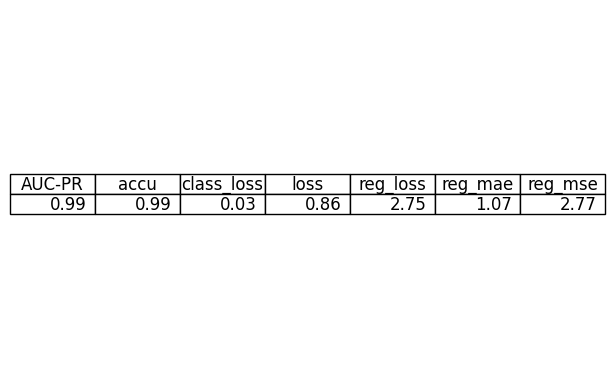

In [ ]:
from tensorflow.keras.models import load_model


metrics = model.evaluate(
    X_test,
    {'regression_output': y_test[:, 0], 'classification_output': y_test[:, 1]},
    verbose=2,
    return_dict=True  # Retorna um dicionário com as métricas
)


metrics_df = pd.DataFrame([metrics])

for column in metrics_df.columns:
    metrics_df[column] = metrics_df[column].round(decimals=2)

abreviacoes = {
    'loss': 'loss',
    'regression_output_loss': 'reg_loss',
    'val_regression_output_loss': 'val_reg_loss',
    'regression_output_mae': 'reg_mae',
    'val_regression_output_mae': 'val_reg_mae',
    'regression_output_mse': 'reg_mse',
    'val_regression_output_mse': 'val_reg_mse',
    'classification_output_loss': 'class_loss',
    'val_classification_output_loss': 'val_class_loss',
    'classification_output_accuracy': 'accu',
    'val_classification_output_accuracy': 'val_accu',
    'classification_output_AUC-PR': 'AUC-PR',
    'val_classification_output_auc': 'val_AUC'
}

metrics_df = metrics_df.rename(columns=abreviacoes)

fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

In [ ]:
pesos = model.get_weights()
model.save_weights('pesos.weights.h5')

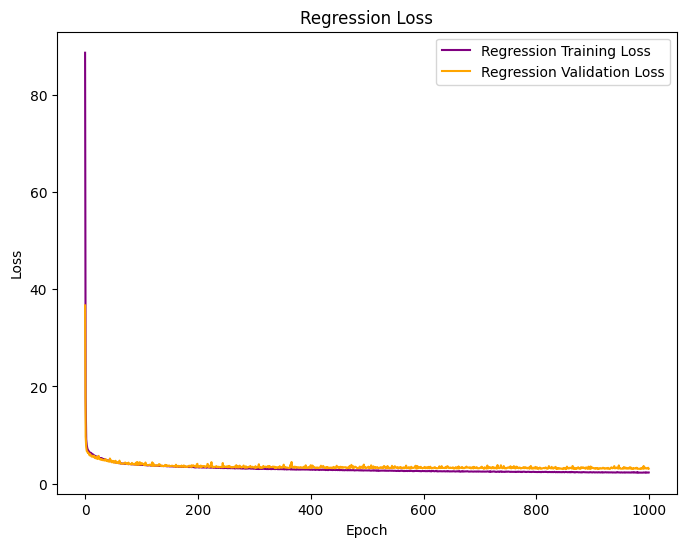

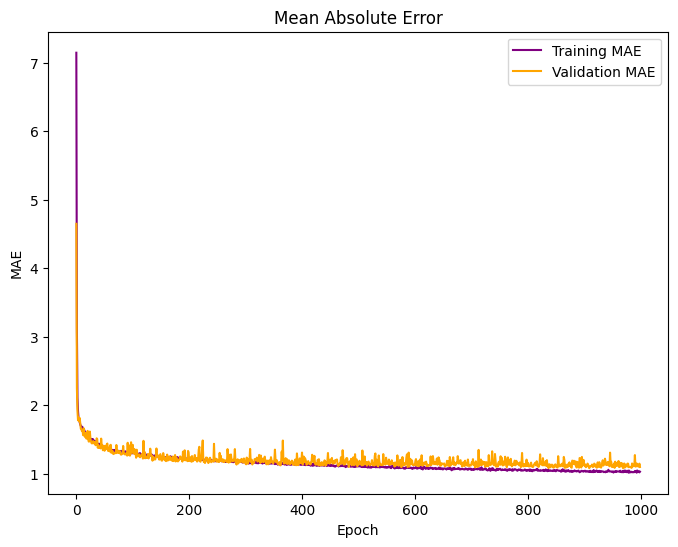

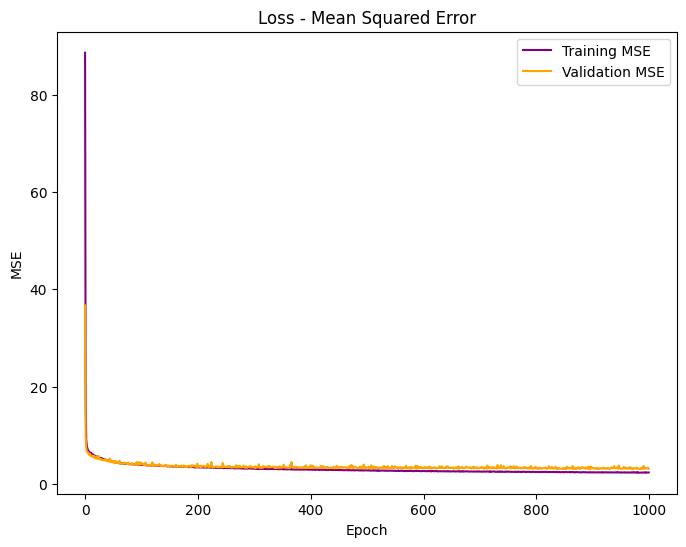

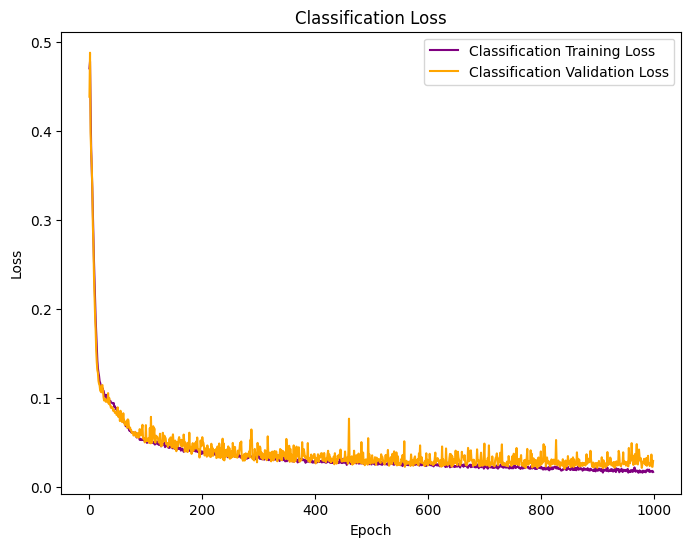

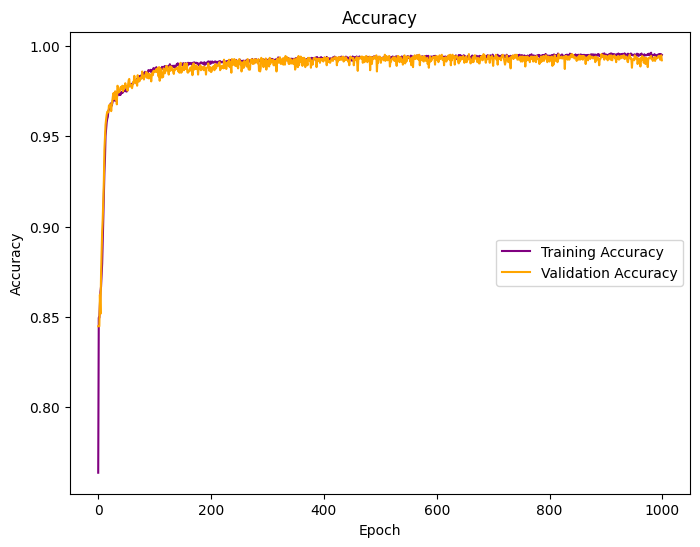

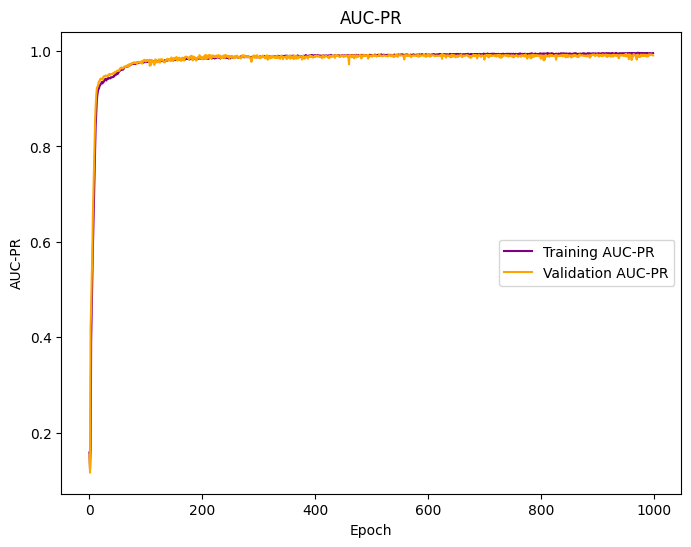

In [ ]:
import matplotlib.pyplot as plt

# Plotagem da Loss de Regressão
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(history.history['regression_output_loss'], label='Regression Training Loss', color='purple')
plt.plot(history.history['val_regression_output_loss'], label='Regression Validation Loss',color='orange')
plt.title('Regression Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotagem do MSE
plt.figure(figsize=(8, 6))
plt.plot(history.history['regression_output_mae'], label='Training MAE', color='purple')
plt.plot(history.history['val_regression_output_mae'], label='Validation MAE', color='orange')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotagem do MSE
plt.figure(figsize=(8, 6))
plt.plot(history.history['regression_output_mse'], label='Training MSE', color='purple')
plt.plot(history.history['val_regression_output_mse'], label='Validation MSE', color='orange')
plt.title('Loss - Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotagem da Loss de Classificação
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(history.history['classification_output_loss'], label='Classification Training Loss', color='purple')
plt.plot(history.history['val_classification_output_loss'], label='Classification Validation Loss', color='orange')
plt.title('Classification Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plotagem da Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['classification_output_accuracy'], label='Training Accuracy', color='purple')
plt.plot(history.history['val_classification_output_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()

# Plotagem da Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['classification_output_AUC-PR'], label='Training AUC-PR', color='purple')
plt.plot(history.history['val_classification_output_AUC-PR'], label='Validation AUC-PR', color='orange')
plt.title('AUC-PR')
plt.ylabel('AUC-PR')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import MeanSquaredError

best_model = load_model('best_model.h5', custom_objects={'mse': MeanSquaredError})

y_pred = best_model.predict(X_test, verbose=2)
y_pred = np.asarray(y_pred)
y_pred = y_pred.squeeze() # Reduzir dimensão do vetor - 3D para 2D
y_pred = np.transpose(y_pred) # Transpor o vetor

r, p_value = pearsonr(y_test[:,0], y_pred[:,0])
print(f'Coeficiente de Correlação de Pearson (R): {r}')

from sklearn.metrics import r2_score

r2 = r2_score(y_test[:,0], y_pred[:,0])
print(f'R-quadrado: {r2}')

51/51 - 0s - 4ms/step
Coeficiente de Correlação de Pearson (R): 0.9706943387311437
R-quadrado: 0.941439000047945


In [ ]:
y_pred[1]

array([1.8580479e+01, 7.9005753e-04], dtype=float32)

In [ ]:
# Get the F1-score, accuracy, precision and recall
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_binary = (y_pred[:,1] > 0.5).astype(int)

confusion_matrix = confusion_matrix(y_test[:,1],y_pred_binary)
accuracy = accuracy_score(y_test[:,1],y_pred_binary)
precision = precision_score(y_test[:,1],y_pred_binary)
recall = recall_score(y_test[:,1],y_pred_binary)
f1 = f1_score(y_test[:,1], y_pred_binary)


print(confusion_matrix)
print(f"Acurácia:{accuracy}")
print(f"Precisão:{precision}")
print(f"Recall:{recall}")
print(f"F1-score: {f1}")

[[1386    2]
 [  10  219]]
Acurácia:0.9925788497217068
Precisão:0.9909502262443439
Recall:0.9563318777292577
F1-score: 0.9733333333333334


False


[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]


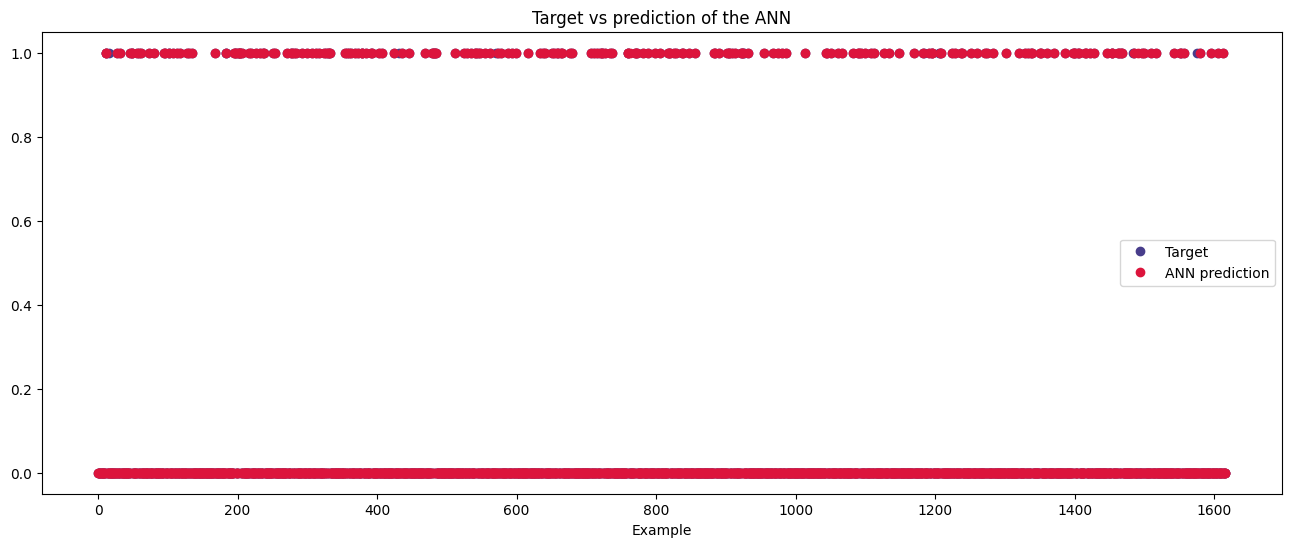

In [ ]:
def Target_vs_Predic(y_test,y_pred):
  plt.figure(figsize=(16, 6))
  plt.plot(y_test, 'o', color = 'darkslateblue', label='Target')
  plt.plot(y_pred, 'o', color = 'crimson', label='ANN prediction')
  plt.title('Target vs prediction of the ANN')
  plt.xlabel('Example')
  plt.legend()
  plt.show
  print(y_test)
  print(y_pred)

Target_vs_Predic(y_test[:,1],y_pred_binary)

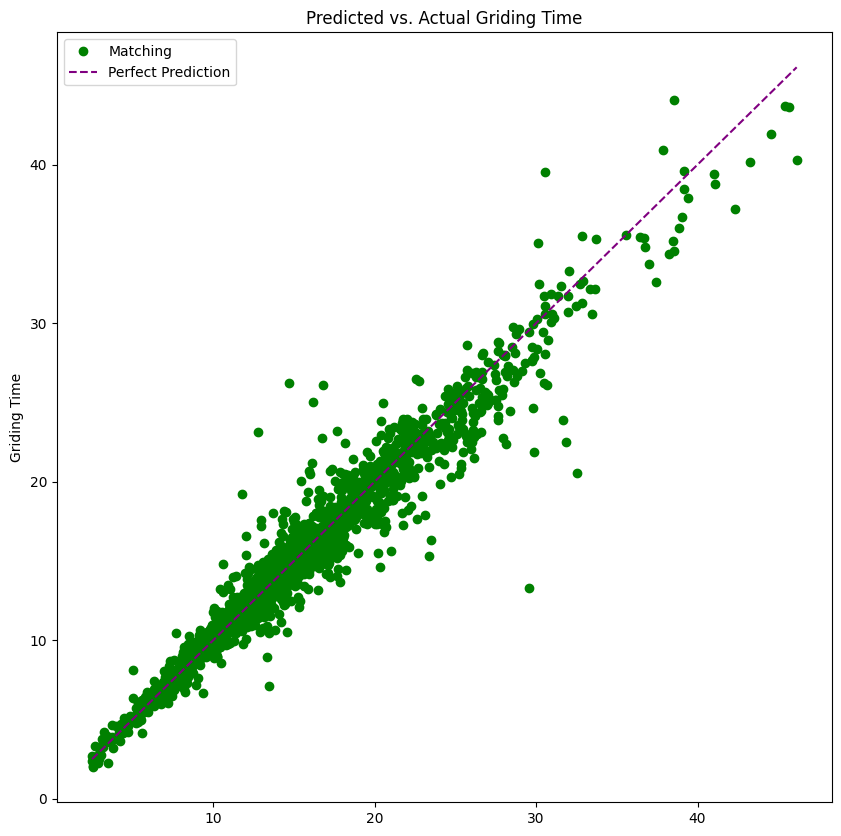

In [ ]:
# Create the plot
plt.figure(figsize=(10, 10))  # Adjust figure size if needed
plt.plot(y_test[:,0], y_pred[:,0], 'o', color='green', label='Matching')
#add ploting of a linear line
plt.plot([min(y_test[:,0]), max(y_test[:,0])], [min(y_test[:,0]), max(y_test[:,0])], color='purple', linestyle='--', label='Perfect Prediction')
plt.ylabel('Griding Time')
plt.title('Predicted vs. Actual Griding Time')
plt.legend()
#plt.grid(True)  # Add a grid for better visualization
plt.show()

In [ ]:
erros_classificacao = np.where(y_test[:, 1] != (y_pred_binary).astype(int))[0]
for i in erros_classificacao:
  if y_test[i, 1] == 1:
    print(f"Caso {i}, Saída {y_pred[i,1]}")

Caso 19, Saída 0.373758465051651
Caso 24, Saída 0.13177290558815002
Caso 26, Saída 0.33576062321662903
Caso 50, Saída 0.4759199619293213
Caso 59, Saída 0.17728179693222046
Caso 62, Saída 0.23738928139209747
Caso 93, Saída 0.1322731077671051
Caso 98, Saída 0.49576690793037415
Caso 125, Saída 0.014696954749524593
Caso 133, Saída 0.48395293951034546
Caso 136, Saída 0.42892009019851685
Caso 145, Saída 0.45762163400650024
Caso 160, Saída 0.41237717866897583
Caso 172, Saída 0.054935045540332794
Caso 186, Saída 0.30950722098350525
Caso 197, Saída 0.367882639169693
Caso 215, Saída 0.2938961982727051
Caso 242, Saída 0.29883113503456116
Caso 247, Saída 0.06121860444545746
Caso 256, Saída 0.3890041410923004
Caso 258, Saída 0.4021167755126953
Caso 263, Saída 0.037779465317726135
Caso 284, Saída 0.45341867208480835
Caso 307, Saída 0.24928037822246552
Caso 320, Saída 0.019657893106341362
Caso 350, Saída 0.2630676329135895
Caso 351, Saída 0.2789660394191742
Caso 355, Saída 0.07119697332382202
Caso 36

**Radom Forest**
---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor(n_estimators=200, verbose=2, min_samples_split=2, max_depth = None, random_state=42)
random_model.fit(X_train, y_train)

y_pred = random_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.1s


building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   21.5s


building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200
Mean Squared Error: 2.9232915108683666
R-squared: 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Spliting dataset in training and testing
X = df.drop(['Griding time'], axis=1)
y = df['Griding time']

# Transformar o y em vetor numpy
y = np.array(y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Defina os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=2)

# Treine o modelo com Grid Search
grid_search.fit(X_train, y_train)

# Imprima os melhores hiperparâmetros
print(grid_search.best_params_)

# Saving the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   7.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   7.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  31.4s
[CV] END max_depth=None, min_s

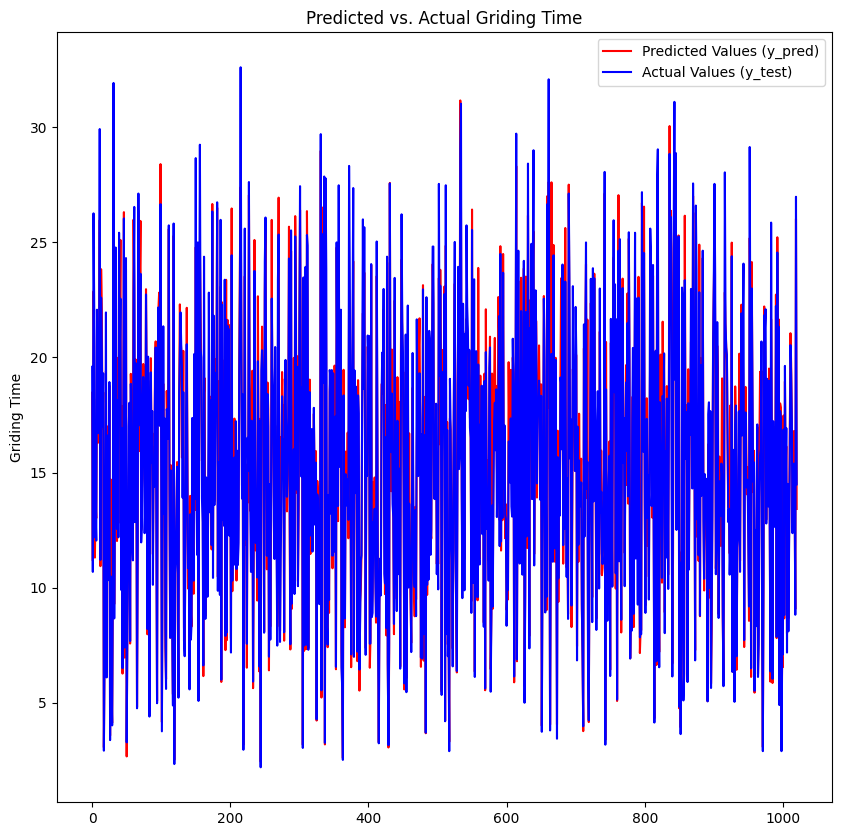

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 10))  # Adjust figure size if needed
plt.plot(y_pred, color='red', label='Predicted Values (y_pred)')
plt.plot(y_test, color='blue', label='Actual Values (y_test)')
plt.ylabel('Griding Time')
plt.title('Predicted vs. Actual Griding Time')
plt.legend()
#plt.grid(True)  # Add a grid for better visualization
plt.show()

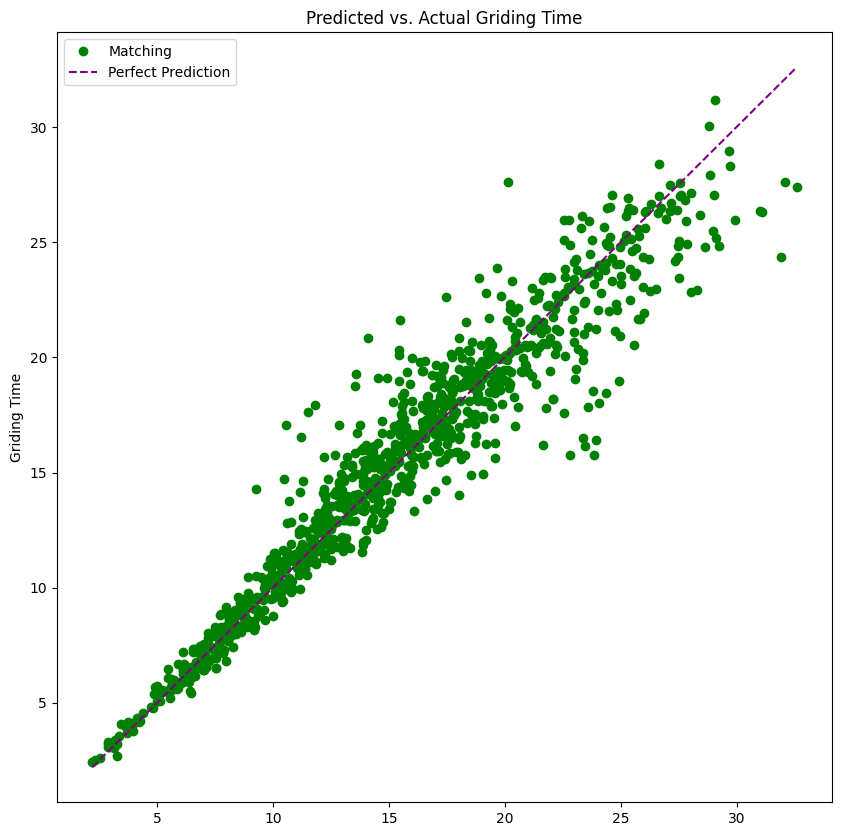

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 10))  # Adjust figure size if needed
plt.plot(y_test, y_pred, 'o', color='green', label='Matching')
#add ploting of a linear line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple', linestyle='--', label='Perfect Prediction')
plt.ylabel('Griding Time')
plt.title('Predicted vs. Actual Griding Time')
plt.legend()
#plt.grid(True)  # Add a grid for better visualization
plt.show()

In [ ]:
def add_gaussian_noise(data, noise_factor=0.05):
  noise = np.random.normal(0, data.std() * noise_factor, data.shape)
  return data + noise

X_test_noisy = add_gaussian_noise(X_test)

In [ ]:
import numpy as np

def mixup_augmentation(X, y, alpha=0.2):
  num_samples = X.shape[0]
  indices = np.arange(num_samples)
  np.random.shuffle(indices)

  lambda_ = np.random.beta(alpha, alpha)

  X_mix = lambda_ * X + (1 - lambda_) * X[indices]
  y_mix = lambda_ * y + (1 - lambda_) * y[indices]

  return X_mix, y_mix

X_augmented, y_augmented = mixup_augmentation(X_test, y_test)

In [ ]:
# Apllying gaussian noise in the test data
'''
noise = np.random.normal(0, X_test.std() * 0.05, X_test.shape)
X_test_noisy = X_test + noise
'''

In [ ]:
y_pred_noisy = random_model.predict(X_test_noisy)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


Mean Squared Error: 35.38626740476021
R-squared: 0.3222785200273821


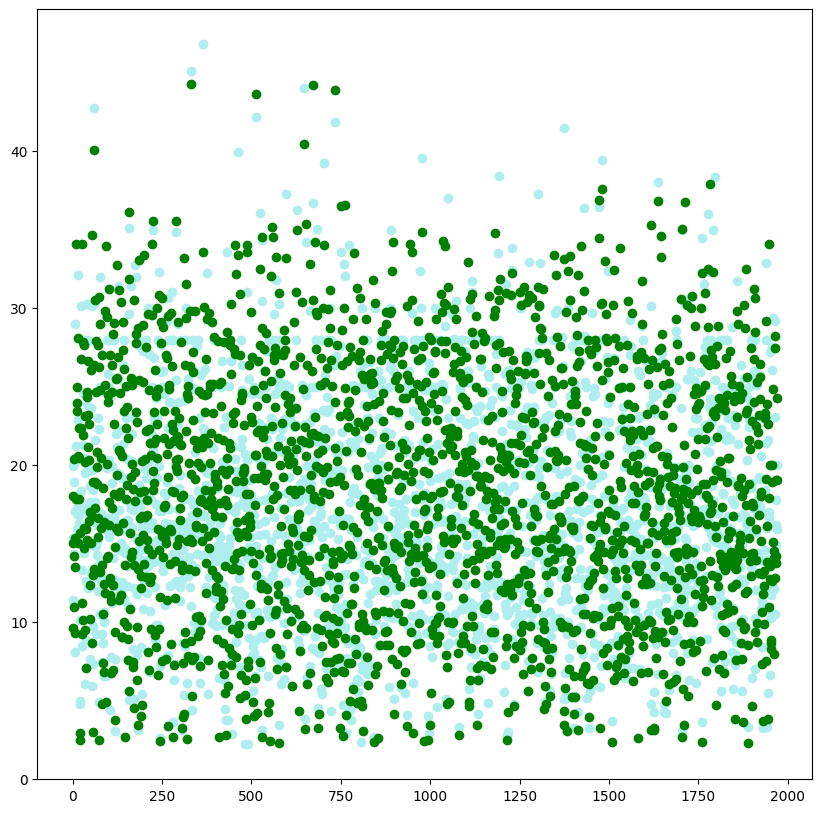

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(y_test,'o', color='paleturquoise', label='Actual Values')
plt.plot(y_pred_noisy,'o', color='green', label='Noisy Values')
plt.show()